In [1]:
from src import *
import matplotlib.pyplot as plt

Frames: 10001 N: 10 Unique maps: 362


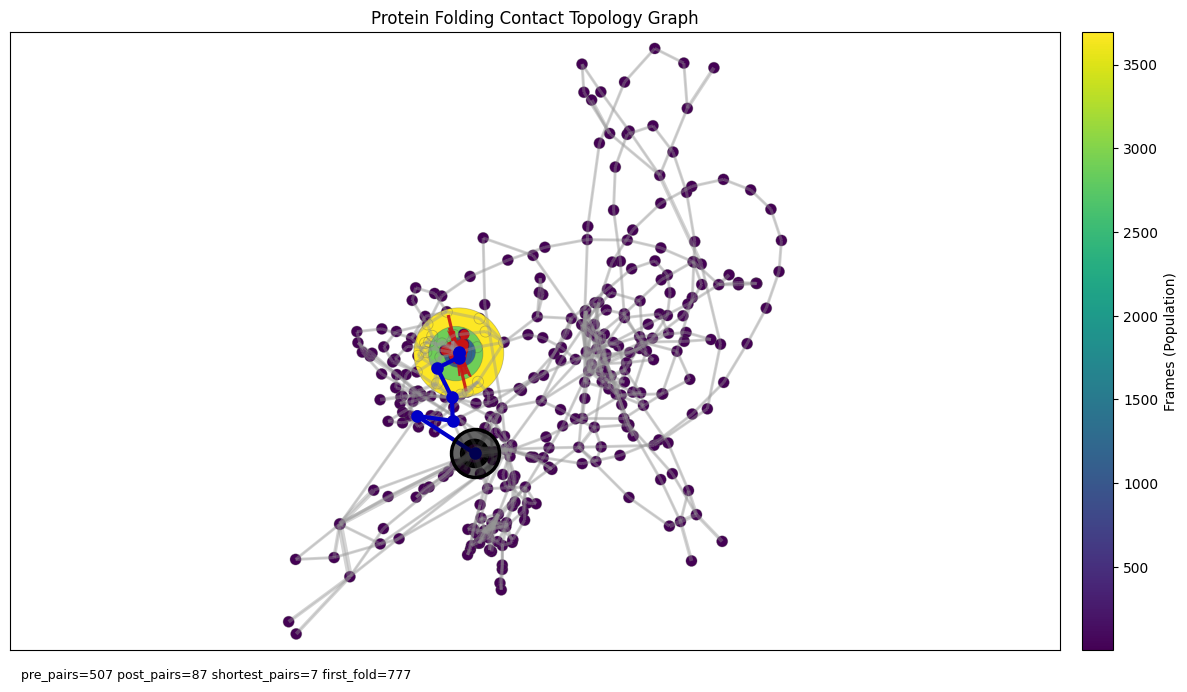

In [2]:
pdb = "/Users/kebl8116-admin/Projects/origami/data/Chignolin/xtc/nvt_prod_1_protein.pdb"
xtc = "/Users/kebl8116-admin/Projects/origami/data/Chignolin/xtc/nvt_prod_1_protein.xtc"

contact_maps = topology.get_contact_maps(top=pdb, traj=xtc)
unique_maps, frame_to_uid, inds = topology.get_unique_maps(contact_maps)

G, counter, node_counts = graphs.build_temporal_transition_graph(frame_to_uid, inds, keep_self_loops=False)
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, unique_maps=unique_maps, unique_indices=inds, interactive=False, count_multiplicity=True)

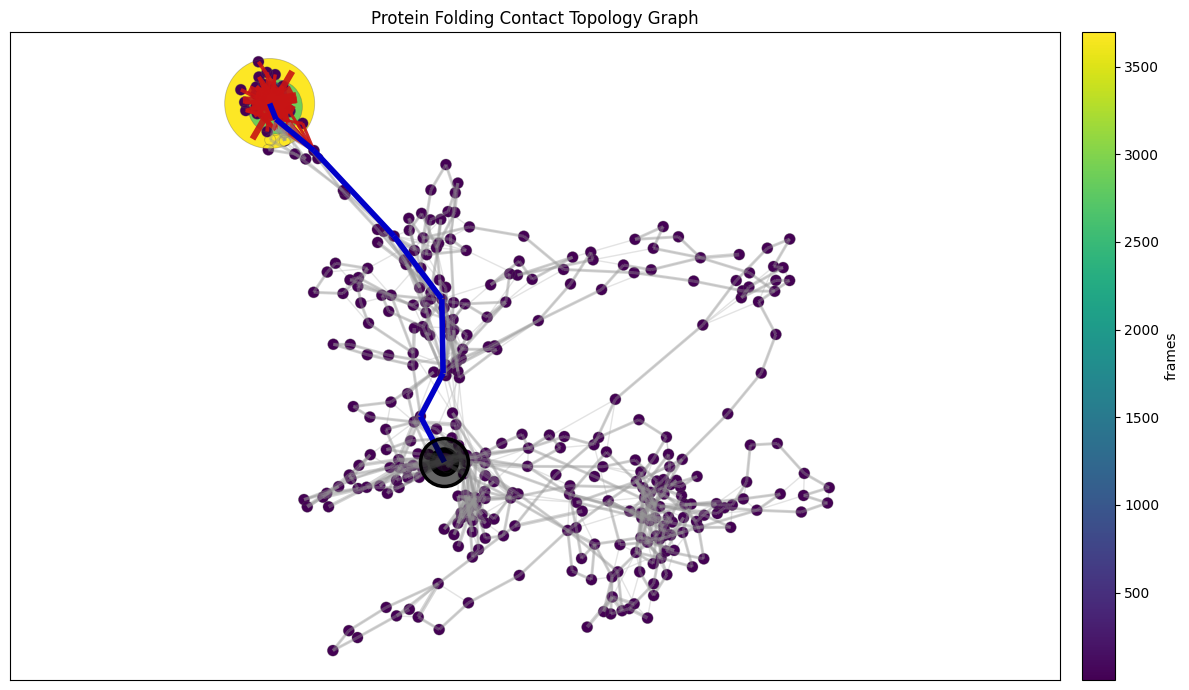

In [ ]:
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)
Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, unique_maps=unique_maps, unique_indices=inds, interactive=False, count_multiplicity=True)

plt.savefig("images/chignolin_temporal_graph.png")

/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


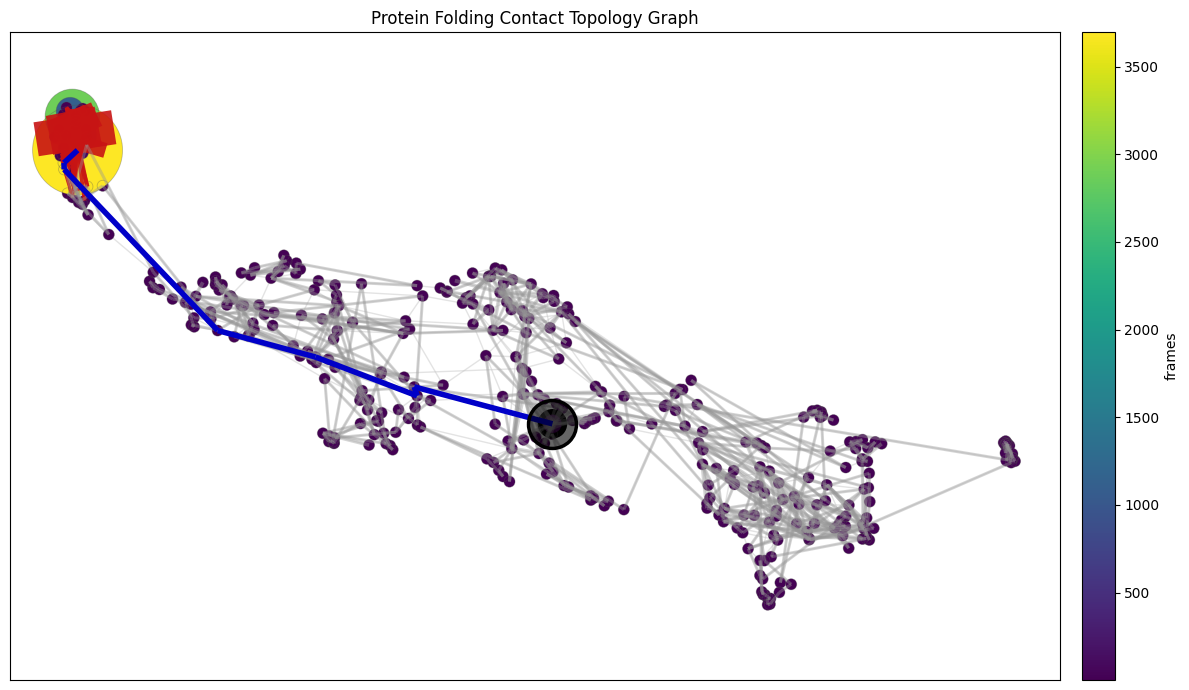

In [286]:
flat_bits, tri, Mbits = topology.flatten_upper_bits(unique_maps)
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)
Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)

def embed_flat_bits(flat_bits, method='umap', n_components=2, n_neighbors=15, random_state=42):
    """
    embed flat_bits (U, Mbits) -> X_emb (U,2)
    Prefer UMAP if available, else Isomap, else SpectralEmbedding, else PCA.
    """
    U = flat_bits.shape[0]
    method = method.lower()
    X = flat_bits.astype(float)  # scikit-learn expects float arrays
    if method == 'umap' and _has_umap:
        reducer = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, random_state=random_state)
        X_emb = reducer.fit_transform(X)
        return X_emb
    if method == 'isomap':
        iso = Isomap(n_components=n_components, n_neighbors=max(5, min(n_neighbors, U-1)))
        X_emb = iso.fit_transform(X)
        return X_emb
    if method == 'spectral':
        sp = SpectralEmbedding(n_components=n_components, n_neighbors=max(5, min(n_neighbors, U-1)))
        X_emb = sp.fit_transform(X)
        return X_emb
    # fallback PCA for extreme cases
    pca = PCA(n_components=n_components, random_state=random_state)
    X_emb = pca.fit_transform(X)
    return X_emb

_has_umap = True
import umap
X_emb = embed_flat_bits(flat_bits, method='umap', n_neighbors=15)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False, count_multiplicity=True)

plt.savefig("images/chignolin_original_manifold_graph.png")

/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


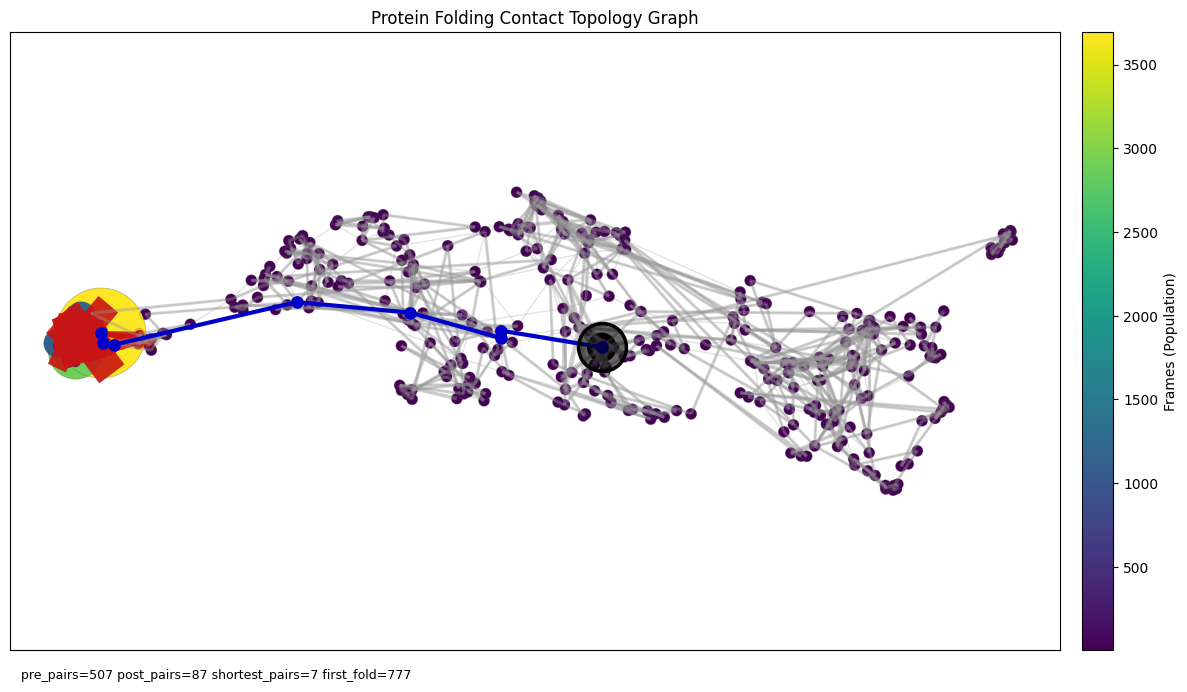

In [3]:
flat_bits, tri, Mbits = topology.flatten_upper_bits(unique_maps)
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)
Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)
X_emb, pca = clustering.embed_flat_bits(flat_bits, pca_n=45, umap_n=2)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False, count_multiplicity=True)
plt.savefig("images/chignolin_manifold_pca_45_umap_2_graph.png")

/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


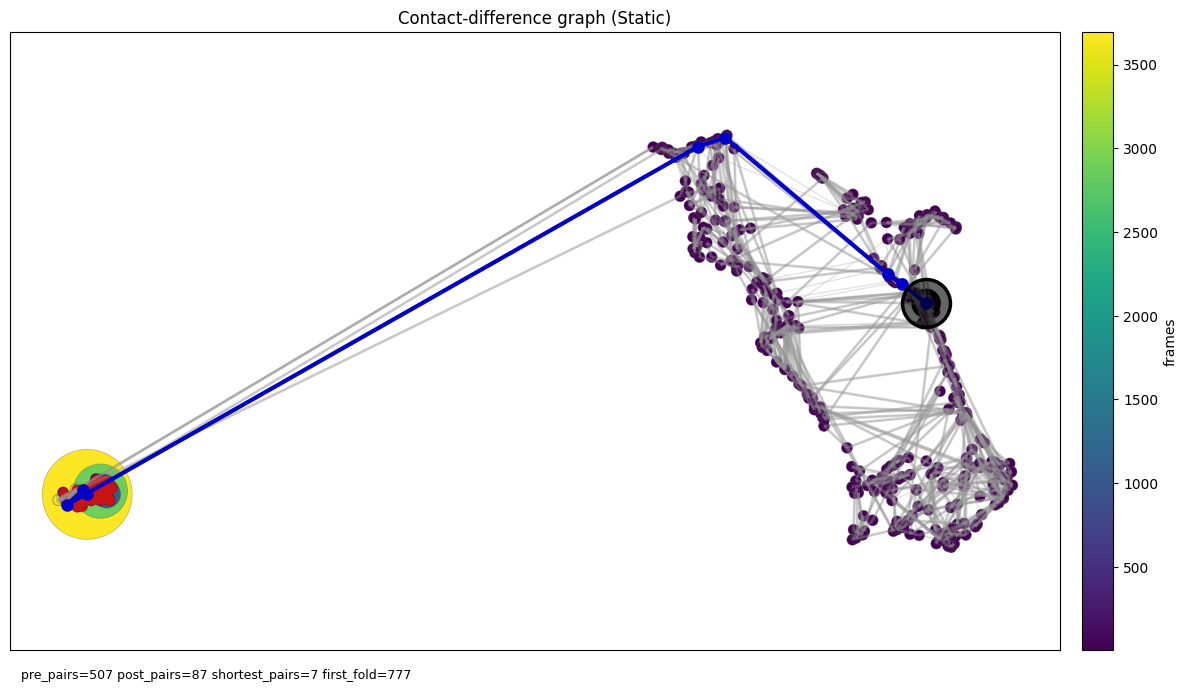

In [ ]:
X_emb, pca = clustering.embed_flat_bits(flat_bits, pca_n=5, umap_n=2)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False, count_multiplicity=True)
plt.savefig("images/chignolin_manifold_pca_5_umap_2_graph.png")

/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/skl

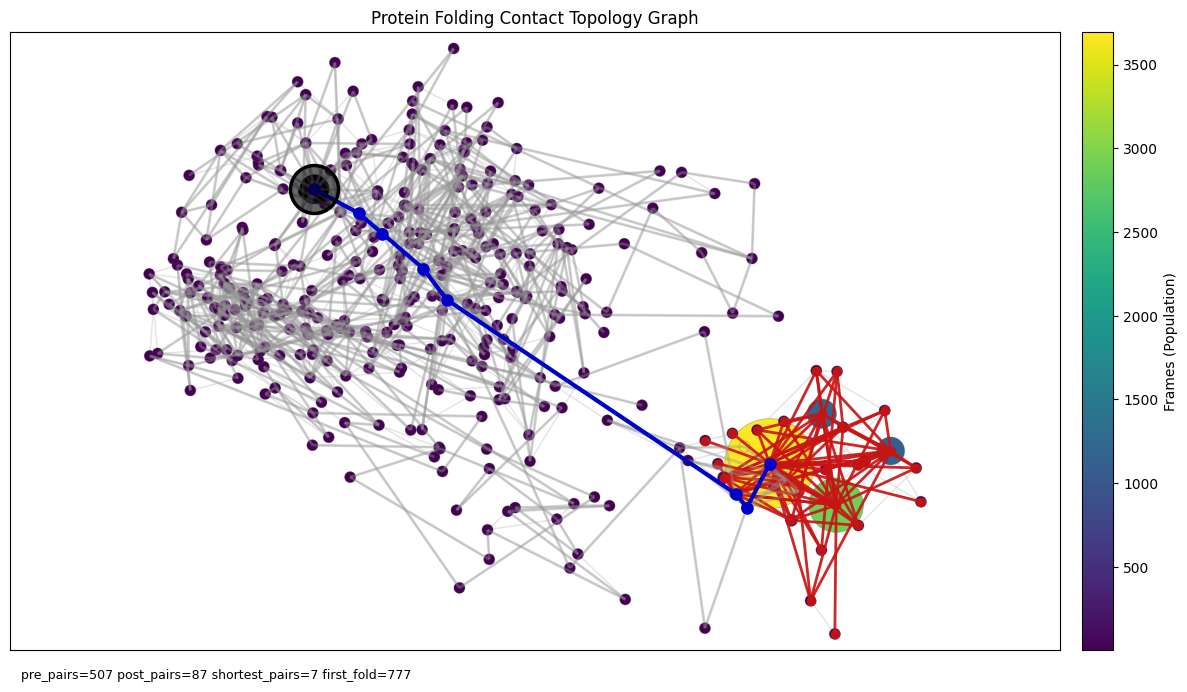

In [9]:
X_emb, labels, D = clustering.embed_and_cluster_by_hamming(ints,
                                 n_components=10,
                                 embed_method='mds',   # 'mds' or 'spectral'
                                 cluster_method='agglomerative',  # 'agglomerative' or 'hdbscan'
                                 n_clusters=None,      # only for agglomerative
                                 random_state=42,
                                 warn_threshold=4000)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False)
plt.savefig("images/chignolin_true_manifold_graph.png")

  - Constrained to Manifold: 907 edges (removed jumps)
Solving Exact Committor System for 362 nodes (Direct Solver)...
  -> Solver success (Exact).
Injected 'committor' values for 362 nodes.


/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/skl

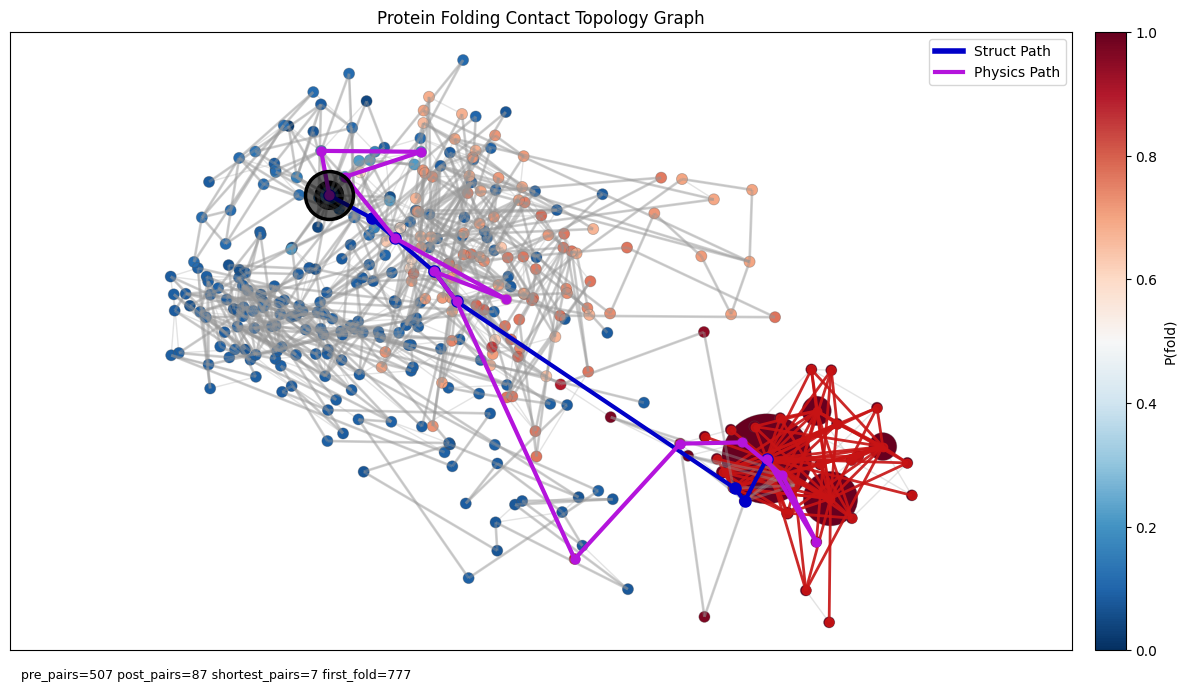

In [ ]:
from src.graph_analysis import *

pdb = "/Users/kebl8116-admin/Projects/origami/data/Chignolin/xtc/nvt_prod_1_protein.pdb"
xtc = "/Users/kebl8116-admin/Projects/origami/data/Chignolin/xtc/nvt_prod_1_protein.xtc"

contact_maps = topology.get_contact_maps(top=pdb, traj=xtc)
unique_maps, frame_to_uid, inds = topology.get_unique_maps(contact_maps)

flat_bits, tri, Mbits = topology.flatten_upper_bits(unique_maps)
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)
Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)

# 1. Build the Physics Graph (Manifold Only + Kinetic)
G = build_physics_graph(G, physics_mode="kinetic", 
                            restrict_to_manifold=True, 
                            frame_to_uid=frame_to_uid)

start_node = int(frame_to_uid[0])
folded_node = int(np.argmax(np.bincount(frame_to_uid)))

path = nx.shortest_path(G, source=start_node, target=folded_node, weight='weight')

q_values = compute_committor(G, start_node, folded_node)

nx.set_node_attributes(G, q_values, 'committor')

nodes = list(G.nodes())
node_colors_q = [G.nodes[i].get('committor', 0.0) for i in range(len(nodes))]

print(f"Injected 'committor' values for {len(nodes)} nodes.")
node_q_colors = [G.nodes[i].get('committor', 0.0) for i in range(len(G.nodes()))]


X_emb, labels, D = clustering.embed_and_cluster_by_hamming(ints,
                                 n_components=10,
                                 embed_method='mds',   # 'mds' or 'spectral'
                                 cluster_method='agglomerative',  # 'agglomerative' or 'hdbscan'
                                 n_clusters=None,      # only for agglomerative
                                 random_state=42,
                                 warn_threshold=4000)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}

fig, ax = plotting.plot_graph_auto(
    G, frame_to_uid, pos=pos, X_emb=X_emb,
    unique_maps=unique_maps,
    unique_indices=inds,
    start_frame=start_node,
    physics_path_nodes=path,  # Overlay the violet path
    node_custom_color=node_q_colors,  # <--- Color by Committor
    node_custom_color_title="P(fold)",
    palette="RdBu_r",                  # Red=Folded, Blue=Unfolded
    interactive = False
)
plt.savefig("images/chignolin_kinetic_manifold_graph.png")


  - Constrained to Manifold: 907 edges (removed jumps)
Solving Exact Committor System for 362 nodes (Direct Solver)...
  -> Solver success (Exact).
Injected 'committor' values for 362 nodes.


/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/skl

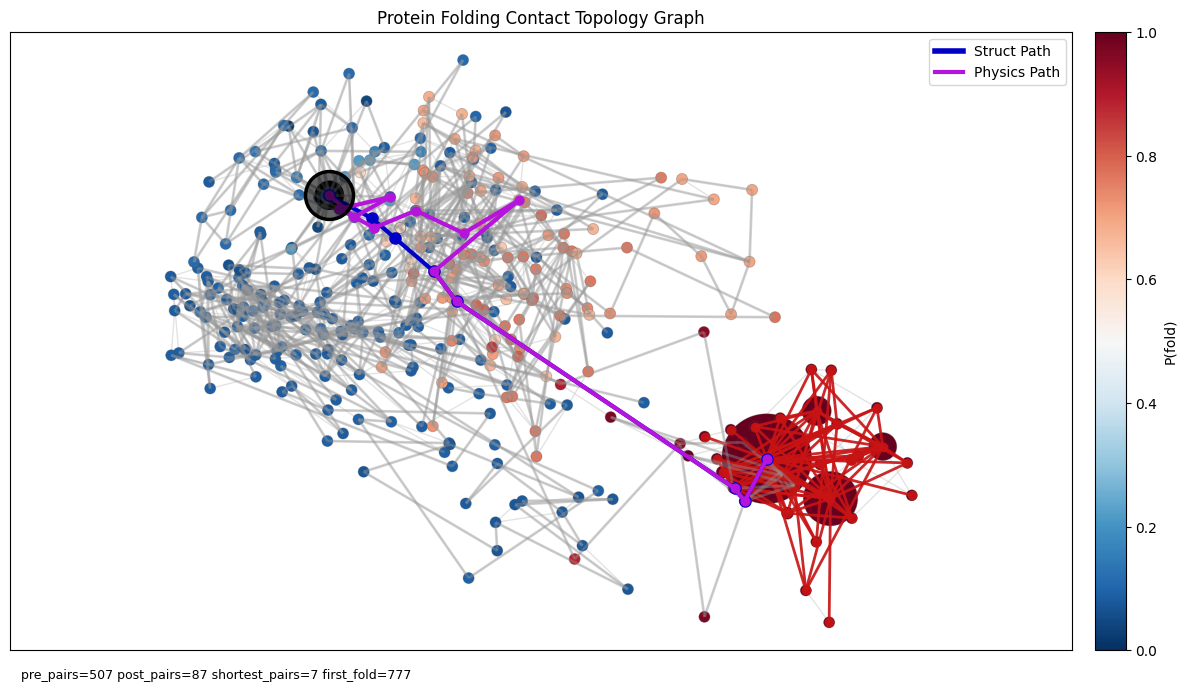

In [8]:
from src.graph_analysis import *

# 1. Build the Physics Graph (Manifold Only + Kinetic)
G = build_physics_graph(G, physics_mode="thermodynamic", 
                            restrict_to_manifold=True, 
                            frame_to_uid=frame_to_uid)

start_node = int(frame_to_uid[0])
folded_node = int(np.argmax(np.bincount(frame_to_uid)))

path = nx.shortest_path(G, source=start_node, target=folded_node, weight='weight')

q_values = compute_committor(G, start_node, folded_node)

nx.set_node_attributes(G, q_values, 'committor')

nodes = list(G.nodes())
node_colors_q = [G.nodes[i].get('committor', 0.0) for i in range(len(nodes))]

print(f"Injected 'committor' values for {len(nodes)} nodes.")
node_q_colors = [G.nodes[i].get('committor', 0.0) for i in range(len(G.nodes()))]


X_emb, labels, D = clustering.embed_and_cluster_by_hamming(ints,
                                 n_components=10,
                                 embed_method='mds',   # 'mds' or 'spectral'
                                 cluster_method='agglomerative',  # 'agglomerative' or 'hdbscan'
                                 n_clusters=None,      # only for agglomerative
                                 random_state=42,
                                 warn_threshold=4000)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}

fig, ax = plotting.plot_graph_auto(
    G, frame_to_uid, pos=pos, X_emb=X_emb,
    unique_maps=unique_maps,
    unique_indices=inds,
    start_frame=start_node,
    physics_path_nodes=path,  # Overlay the violet path
    node_custom_color=node_q_colors,  # <--- Color by Committor
    node_custom_color_title="P(fold)",
    palette="RdBu_r",                  # Red=Folded, Blue=Unfolded
    interactive = False
)
plt.savefig("images/chignolin_thermodynamic_manifold_graph.png")


Manifold path: [0, 15, 202, 270, 295, 232, 228, 292, 294, 321, 323, 329, 326, 333, 325, 328, 337]
Merged path: [0, 5, 216, 295, 228, 332, 334, 337]


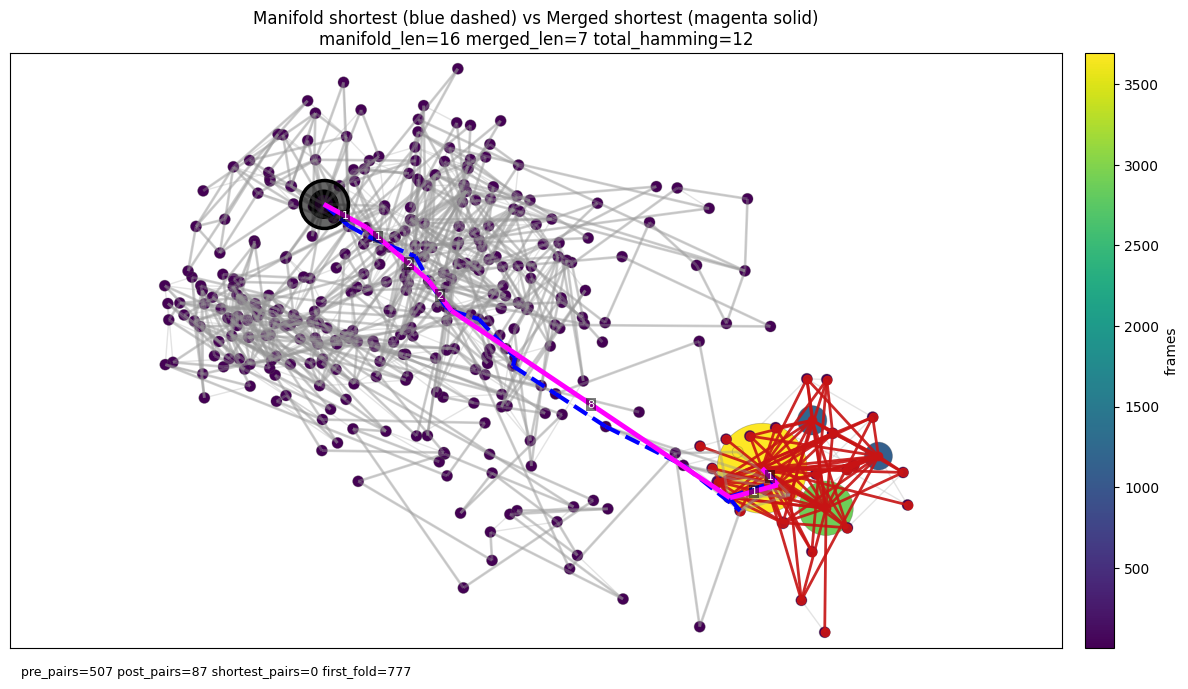

In [270]:
import numpy as np
import networkx as nx
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt

# --- compute shortest paths (manifold vs merged) ---
start_node = int(frame_to_uid[0])   # or whichever start_frame index you want
folded_node = int(np.argmax(np.bincount(frame_to_uid)))

# manifold-only shortest path (Gm)
try:
    path_m = nx.shortest_path(Gm, source=start_node, target=folded_node)
except nx.NetworkXNoPath:
    path_m = []

# merged graph shortest path (G)
try:
    path_t = nx.shortest_path(G, source=start_node, target=folded_node)
except nx.NetworkXNoPath:
    path_t = []

print("Manifold path:", path_m)
print("Merged path:", path_t)

# --- draw base figure using your existing function (merged graph background) ---
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb,
                                  unique_maps=unique_maps, unique_indices=inds,
                                  interactive=False, expand_jumps=True, show_shortest=False)
# note: show_shortest=False so the function doesn't draw its own 'shortest' overlay

# --- helper to convert path into segments in plotting coordinates ---
def path_to_segs(path, pos):
    segs = []
    for i in range(len(path)-1):
        a, b = int(path[i]), int(path[i+1])
        segs.append(((pos[a][0], pos[a][1]), (pos[b][0], pos[b][1])))
    return segs

# --- overlay manifold shortest path (blue dashed) ---
if path_m and len(path_m) > 1:
    segs_m = path_to_segs(path_m, pos)
    lc_m = LineCollection(segs_m, colors='blue', linewidths=3.0, linestyles='--', zorder=50)
    ax.add_collection(lc_m)

# --- overlay merged/temporal shortest path (magenta solid) ---
if path_t and len(path_t) > 1:
    segs_t = path_to_segs(path_t, pos)
    lc_t = LineCollection(segs_t, colors='magenta', linewidths=3.5, linestyles='-', zorder=60)
    ax.add_collection(lc_t)

# --- optional: annotate merged edges with Hamming distances ---
def hamming_dist_int(a:int, b:int) -> int:
    return (a ^ b).bit_count()

if path_t and len(path_t) > 1:
    for (u, v) in zip(path_t[:-1], path_t[1:]):
        u, v = int(u), int(v)
        midx = ((pos[u][0] + pos[v][0]) / 2.0, (pos[u][1] + pos[v][1]) / 2.0)
        a = int(ints[u])  # ints is your mapping uid -> integer contact map
        b = int(ints[v])
        d = hamming_dist_int(a, b)
        ax.text(midx[0], midx[1], str(d), color='white', fontsize=8, ha='center', va='center', zorder=70,
                bbox=dict(facecolor='black', alpha=0.5, pad=1, edgecolor='none'))

# --- final touches & save ---
ax.set_title(f"Manifold shortest (blue dashed) vs Merged shortest (magenta solid)\n"
             f"manifold_len={max(0,len(path_m)-1)} merged_len={max(0,len(path_t)-1)} total_hamming={hamming_dist_int(ints[start_node], ints[folded_node])}")
plt.tight_layout()
plt.savefig("images/chignolin_compare_shortest_paths.png", dpi=200)
plt.show()



In [272]:
# 1. Calculate outgoing counts for every node
outgoing_counts = {}
for u in G.nodes:
    # sum of temp_count for all neighbors v
    total_out = sum(G[u][v].get('temp_count', 0) for v in G.neighbors(u))
    outgoing_counts[u] = total_out

# 2. Assign Weights
for u, v, d in G.edges(data=True):
    count = d.get('temp_count', 0)
    
    if count > 0 and outgoing_counts[u] > 0:
        # P_ij = count / total_outgoing
        prob = count / outgoing_counts[u]
        d['energy_cost'] = -np.log(prob)
    else:
        # If transition never happened, cost is Infinite
        d['energy_cost'] = float('inf')

# 3. Find the "Physically Most Likely" Path
# This path avoids "rare" transitions even if they are topologically short.
physics_path = nx.shortest_path(G, source=0, target=337, weight='energy_cost')
physics_path

[0, 5, 216, 295, 228, 332, 338, 337]

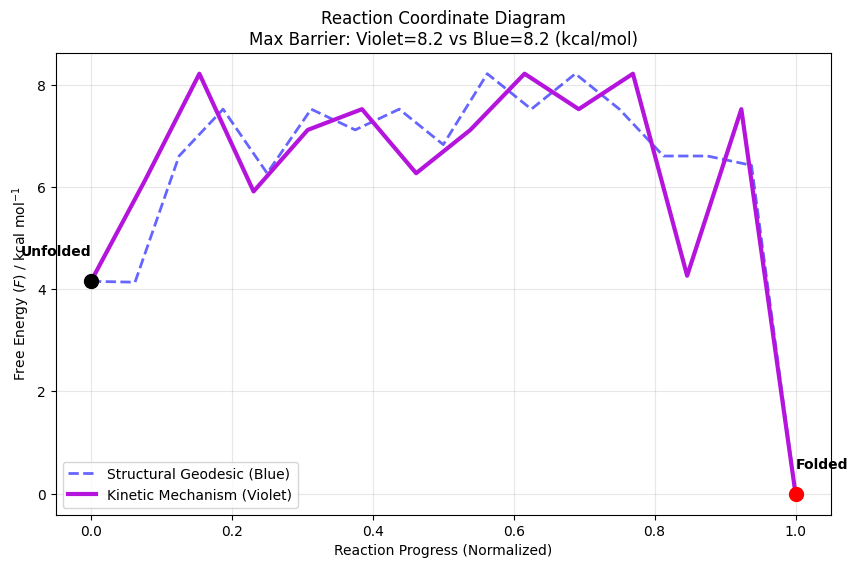

In [298]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

def plot_reaction_coordinate_comparison(G, start_node, folded_node, 
                                      physics_path_nodes, structural_path_nodes, 
                                      F_map):
    """
    Plots the Free Energy profile along the two competing pathways.
    F_map: Dictionary of Free Energy values {node_id: kcal_mol}
    """
    
    # 1. Extract Profiles
    def get_profile(path_nodes):
        # x-axis: Progress (0 to 1) based on index in path
        # y-axis: Free Energy F
        energies = [F_map.get(n, 0) for n in path_nodes]
        return energies

    y_violet = get_profile(physics_path_nodes)
    y_blue = get_profile(structural_path_nodes)
    
    # 2. Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Normalize X-axis (Reaction Progress)
    x_violet = np.linspace(0, 1, len(y_violet))
    x_blue = np.linspace(0, 1, len(y_blue))
    
    # Plot Lines
    ax.plot(x_blue, y_blue, color='blue', linestyle='--', linewidth=2, alpha=0.6, label='Structural Geodesic (Blue)')
    ax.plot(x_violet, y_violet, color='#B414DC', linewidth=3, label='Kinetic Mechanism (Violet)')
    
    # Highlight Start/End
    ax.scatter([0], [y_violet[0]], color='black', s=100, zorder=10)
    ax.text(0, y_violet[0]+0.5, "Unfolded", ha='right', fontweight='bold')
    
    ax.scatter([1], [y_violet[-1]], color='red', s=100, zorder=10)
    ax.text(1, y_violet[-1]+0.5, "Folded", ha='left', fontweight='bold')
    
    # 3. Calculate and Annotation Barriers
    max_blue = max(y_blue)
    max_violet = max(y_violet)
    
    ax.set_title(f"Reaction Coordinate Diagram\nMax Barrier: Violet={max_violet:.1f} vs Blue={max_blue:.1f} (kcal/mol)")
    ax.set_xlabel("Reaction Progress (Normalized)")
    ax.set_ylabel("Free Energy ($F$) / kcal mol$^{-1}$")
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    return fig


def pseudo_free_energy(node_counts, node_list):
    ''' 
    Calculate pseudo-Free Energy F for each node by boltzmann
    inversion
    '''
    # Calculate pseudo-Free Energy F for each node
    F = {}
    max_count = node_counts.max()
    for n in node_list:
        c = node_counts.get(n, 1)
        F[n] = -np.log(c / max_count) # F=0 for most populated state
    return F
node_counts = pd.Series(frame_to_uid).value_counts()
node_list = list(G.nodes())
F = pseudo_free_energy(node_counts, node_list)
# 3. Plot
fig = plot_reaction_coordinate_comparison(G_kin, start_node, folded_node, 
                                          physics_path_nodes=path_kin, # The violet path
                                          structural_path_nodes=path_m, # The blue path
                                          F_map=F)
plt.show()

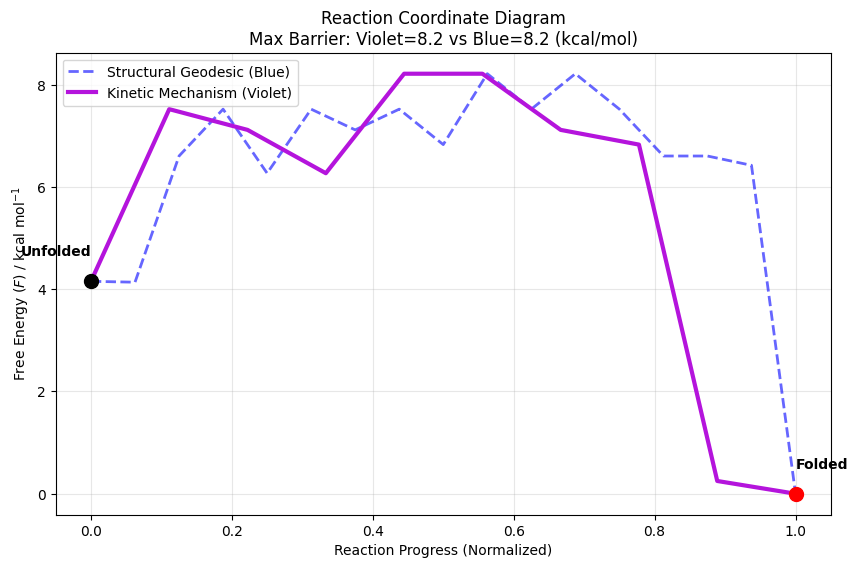

In [296]:
node_counts = pd.Series(frame_to_uid).value_counts()
node_list = list(G.nodes())
F = pseudo_free_energy(node_counts, node_list)
# 3. Plot
fig = plot_reaction_coordinate_comparison(G_therm, start_node, folded_node, 
                                          physics_path_nodes=path_wsme, # The violet path
                                          structural_path_nodes=path_m, # The blue path
                                          F_map=F)
plt.show()

Most Probable Path (MPP): 8 steps
Min Free Energy Path: 13 steps


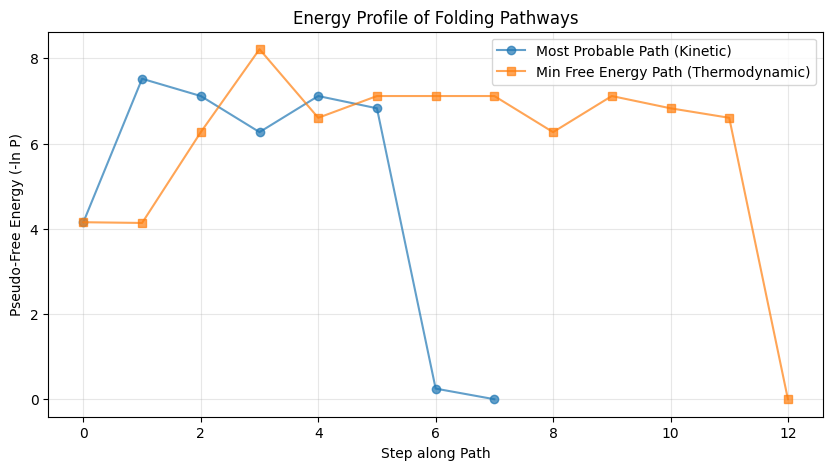

In [273]:
import numpy as np
import networkx as nx

# --- 1. Compute Transition Probabilities (Kinetic Matrix) ---
# Transition Counts Matrix C_ij
C = nx.to_numpy_array(G, weight='temp_count', nodelist=G.nodes())
row_sums = C.sum(axis=1)

# Handle sink nodes (avoid division by zero)
row_sums[row_sums == 0] = 1 
P = C / row_sums[:, np.newaxis]

# --- 2. Define Weights ---

# A. Kinetic Weight: -ln(P_ij)
# Add small epsilon to avoid log(0)
P_safe = np.where(P > 0, P, 1e-10)
W_kin = -np.log(P_safe)

# B. WSME-Style Thermodynamic Weight (Approximate)
# We assume Free Energy F ~ -ln(Population) (Boltzmann Inversion)
# F_i = -ln(P_i_equilibrium) approx -ln(Degree/2M) or -ln(node_visit_count)
# Let's use node visit counts from your trajectory
node_counts = pd.Series(frame_to_uid).value_counts()
node_list = list(G.nodes())

# Calculate pseudo-Free Energy F for each node
F = {}
max_count = node_counts.max()
for n in node_list:
    c = node_counts.get(n, 1)
    F[n] = -np.log(c / max_count) # F=0 for most populated state

# Define Edge Weight based on Delta F
# Weight = max(0, F_dest - F_source) (Uphill requires work, Downhill is free)
W_therm = np.zeros_like(W_kin)
for i, u in enumerate(node_list):
    for j, v in enumerate(node_list):
        if G.has_edge(u, v):
            dF = F[v] - F[u]
            # Standard Metropolis-like barrier
            W_therm[i, j] = max(0, dF) + 0.1 # 0.1 is a base diffusion cost

# --- 3. Build the Physics Graphs ---

G_kin = G.copy()
G_therm = G.copy()

nodes = list(G.nodes())
node_idx = {n: i for i, n in enumerate(nodes)}

for u, v in G.edges():
    i, j = node_idx[u], node_idx[v]
    
    # Kinetic Weight
    w_k = W_kin[i, j]
    # Check for infinite weight (disconnected in probability)
    if w_k > 100: w_k = 10000 
    G_kin[u][v]['weight'] = w_k
    
    # Thermodynamic Weight
    w_t = W_therm[i, j]
    G_therm[u][v]['weight'] = w_t

# --- 4. Calculate Physics-Based Paths ---

start_node = int(frame_to_uid[0])
folded_node = int(np.argmax(np.bincount(frame_to_uid))) # Node with lowest F

# Path A: Most Probable Path (Kinetic)
try:
    path_mpp = nx.shortest_path(G_kin, source=start_node, target=folded_node, weight='weight')
    print(f"Most Probable Path (MPP): {len(path_mpp)} steps")
except:
    print("MPP not found.")
    path_mpp = []

# Path B: Min Free Energy Barrier Path (Thermodynamic)
try:
    path_mfep = nx.shortest_path(G_therm, source=start_node, target=folded_node, weight='weight')
    print(f"Min Free Energy Path: {len(path_mfep)} steps")
except:
    print("MFEP not found.")
    path_mfep = []
    
# Compare costs
def get_path_energy_profile(graph, path, F_map):
    energies = [F_map.get(n, 0) for n in path]
    return energies

energies_mpp = get_path_energy_profile(G_therm, path_mpp, F)
energies_mfep = get_path_energy_profile(G_therm, path_mfep, F)

# Plotting the Energy Profile
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(energies_mpp, label='Most Probable Path (Kinetic)', marker='o', alpha=0.7)
plt.plot(energies_mfep, label='Min Free Energy Path (Thermodynamic)', marker='s', alpha=0.7)
plt.xlabel("Step along Path")
plt.ylabel("Pseudo-Free Energy (-ln P)")
plt.title("Energy Profile of Folding Pathways")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [275]:
print("energies_mpp:", energies_mpp, "energies_mfep:", energies_mfep)

energies_mpp: [np.float64(4.154292822835883), np.float64(7.521588652822357), np.float64(7.116123544714193), np.float64(6.2688256843269885), np.float64(7.116123544714193), np.float64(6.828441472262411), np.float64(0.24919026025231056), np.float64(-0.0)] energies_mfep: [np.float64(4.154292822835883), np.float64(4.137198389476582), np.float64(6.2688256843269885), np.float64(8.214735833382303), np.float64(6.6052979209482015), np.float64(7.116123544714193), np.float64(7.116123544714193), np.float64(7.116123544714193), np.float64(6.2688256843269885), np.float64(7.116123544714193), np.float64(6.828441472262411), np.float64(6.6052979209482015), np.float64(-0.0)]


Calculating Committor Probabilities (Reaction Coordinate)...
Solving Committor System (might take a moment)...

Results:
Total Nodes Scored: 362
Transition State Ensemble (TSE) size: 11 nodes


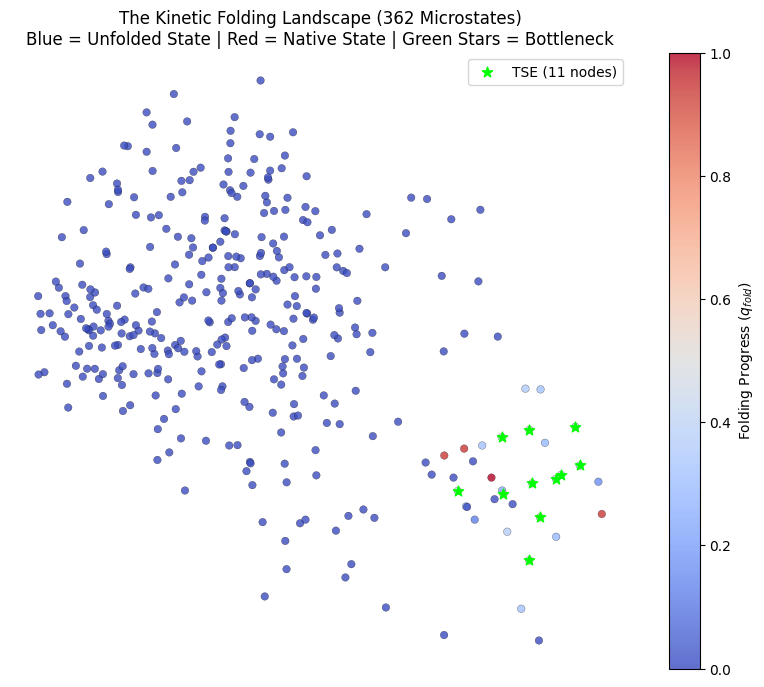

Transition State Ensemble (TSE) Node IDs: [334, 338, 342, 343, 344, 348, 350, 352, 353, 357, 360]


In [278]:
import numpy as np
import scipy.sparse.linalg
import networkx as nx
import pandas as pd

def calculate_committor(G, start_node, folded_node):
    """
    Solves L q = 0 for the committor probabilities q.
    """
    # 1. Build the Transition Matrix P
    # We use 'temp_count' as the raw weight (flux)
    nodes = list(G.nodes())
    n = len(nodes)
    node_to_idx = {node: i for i, node in enumerate(nodes)}
    
    # Adjacency matrix weighted by counts
    A = nx.to_scipy_sparse_array(G, nodelist=nodes, weight='temp_count', format='csr')
    
    # Row normalize to get Probability Matrix P
    # (Add epsilon to avoid division by zero for sink states)
    row_sums = np.array(A.sum(axis=1)).flatten()
    row_sums[row_sums == 0] = 1e-10
    
    # Build Laplacian-like operator (I - P)
    # Solving (I - P)q = 0 is equivalent to finding the steady state, 
    # but we enforce boundaries.
    
    # We construct the linear system A_sys * x = b_sys
    # A_sys is (I - P) but with boundary rows replaced by Identity
    
    from scipy.sparse import eye, lil_matrix
    P = A.multiply(1.0 / row_sums[:, np.newaxis])
    I = eye(n, format='csr')
    L = I - P
    
    # Convert to LIL for efficient row slicing/setting
    L = L.tolil()
    b = np.zeros(n)
    
    # 2. Apply Boundary Conditions
    # Start Node: q = 0 (Source/Unfolded Basin)
    s_idx = node_to_idx[start_node]
    L[s_idx, :] = 0
    L[s_idx, s_idx] = 1
    b[s_idx] = 0.0
    
    # Folded Node: q = 1 (Target/Native Basin)
    f_idx = node_to_idx[folded_node]
    L[f_idx, :] = 0
    L[f_idx, f_idx] = 1
    b[f_idx] = 1.0
    
    # 3. Solve Linear System
    # Use sparse solver (BiCGSTAB is robust for non-symmetric matrices)
    print("Solving Committor System (might take a moment)...")
    q, info = scipy.sparse.linalg.bicgstab(L.tocsr(), b, rtol=1e-10)
    
    if info != 0:
        print(f"Warning: Solver failed to converge (Info: {info})")
        
    return {node: val for node, val in zip(nodes, q)}

# --- EXECUTE ---
print("Calculating Committor Probabilities (Reaction Coordinate)...")
q_values = calculate_committor(G, start_node, folded_node)

# --- ANALYZE TSE (Transition State Ensemble) ---
# TSE is defined as states with q approx 0.5 (0.4 to 0.6)
tse_nodes = [n for n, q in q_values.items() if 0.4 <= q <= 0.6]

print(f"\nResults:")
print(f"Total Nodes Scored: {len(q_values)}")
print(f"Transition State Ensemble (TSE) size: {len(tse_nodes)} nodes")

# --- PLOTTING ---
# Visualize the graph colored by Committor Probability (q)
# This shows the 'True' folding progress, distinct from simple geometry.
if len(q_values) > 0:
    import matplotlib.pyplot as plt
    
    # Extract colors in order of 'pos' keys
    node_colors = [q_values.get(n, 0) for n in frame_to_uid] # Map to frames for scatter
    # Or better: scatter the unique nodes
    
    # Re-plot embedding colored by q
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # We extract the q-value for each node index corresponding to the rows of X_emb.
    num_nodes = X_emb.shape[0]
    
    # Use 0.5 (TSE value) as default if a node is missing from q_values for some reason
    colors_unique = [q_values.get(i, 0.5) for i in range(num_nodes)]
    
    # 2. Plot the Landscape (Unique Nodes)
    sc = ax.scatter(X_emb[:,0], X_emb[:,1], c=colors_unique, 
                    cmap='coolwarm', s=30, alpha=0.8, edgecolor='k', linewidth=0.2)
    
    cbar = plt.colorbar(sc, ax=ax, label='Folding Progress ($q_{fold}$)')
    
    # 3. Highlight the TSE (Transition State Ensemble)
    # Identify nodes where q is approx 0.5
    tse_indices = [i for i, q in enumerate(colors_unique) if 0.4 <= q <= 0.6]
    
    if tse_indices:
        ax.scatter(X_emb[tse_indices, 0], X_emb[tse_indices, 1], 
                   c='lime', s=60, marker='*', label=f'TSE ({len(tse_indices)} nodes)', zorder=10)
        
    ax.set_title(f"The Kinetic Folding Landscape ({num_nodes} Microstates)\nBlue = Unfolded State | Red = Native State | Green Stars = Bottleneck")
    ax.legend(loc='upper right')
    plt.axis('off')
    plt.show()

    # Optional: Print the IDs of the TSE nodes so you can visualize their structures later
    print("Transition State Ensemble (TSE) Node IDs:", tse_indices)

Re-calculating with Direct Solver...
Solving exact linear system for 362 nodes...
Solver success!

VALIDATED Results:
  - Total Nodes Scored: 362
  - True TSE size: 89 nodes


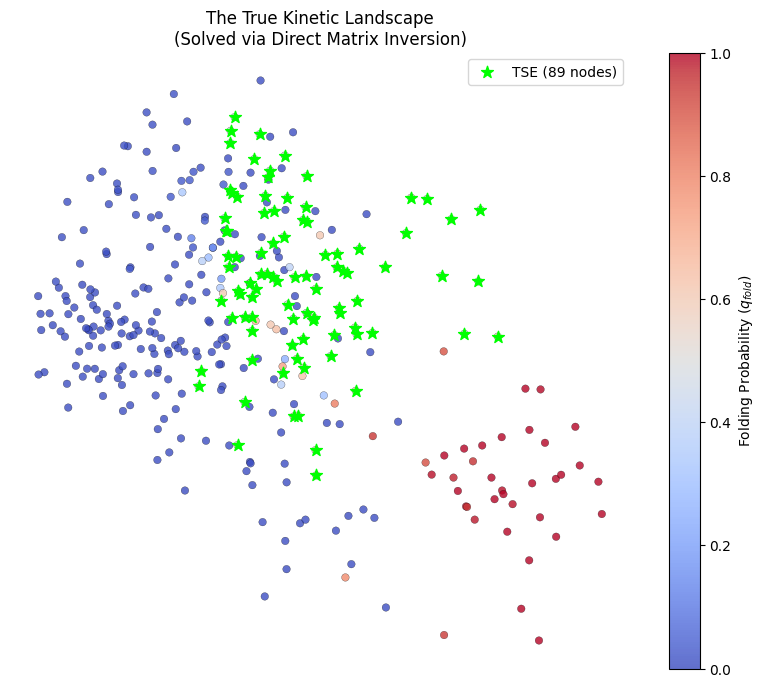

TSE Node IDs: [219, 220, 221, 222, 223, 224, 225, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 293, 294, 295, 296, 297, 298, 299, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 317, 318]


In [279]:
import numpy as np
import scipy.sparse
import scipy.sparse.linalg
import networkx as nx
import matplotlib.pyplot as plt

def calculate_committor_direct(G, start_node, folded_node):
    """
    Solves L q = 0 using a DIRECT solver (robust for small/medium graphs).
    """
    nodes = list(G.nodes())
    n = len(nodes)
    node_to_idx = {node: i for i, node in enumerate(nodes)}
    
    # 1. Build Adjacency & Transition Matrix
    A = nx.to_scipy_sparse_array(G, nodelist=nodes, weight='temp_count', format='csr')
    
    row_sums = np.array(A.sum(axis=1)).flatten()
    row_sums[row_sums == 0] = 1e-10 # Safety
    
    # P = D^-1 * A
    D_inv = scipy.sparse.diags(1.0 / row_sums)
    P = D_inv @ A
    
    # 2. Build Laplacian (I - P)
    I = scipy.sparse.eye(n, format='csr')
    L = (I - P).tolil() # LIL is fast for row replacement
    b = np.zeros(n)
    
    # 3. Apply Boundary Conditions (Dirichlet)
    # Start Node -> q = 0
    if start_node in node_to_idx:
        s_idx = node_to_idx[start_node]
        L[s_idx, :] = 0
        L[s_idx, s_idx] = 1.0
        b[s_idx] = 0.0
        
    # Folded Node -> q = 1
    if folded_node in node_to_idx:
        f_idx = node_to_idx[folded_node]
        L[f_idx, :] = 0
        L[f_idx, f_idx] = 1.0
        b[f_idx] = 1.0
        
    # 4. SOLVE EXACTLY (Direct Solver)
    print(f"Solving exact linear system for {n} nodes...")
    try:
        # spsolve uses LU decomposition - it does not iterate.
        q = scipy.sparse.linalg.spsolve(L.tocsr(), b)
        print("Solver success!")
    except RuntimeError as e:
        print(f"Solver Error: {e}")
        print("Graph might be disconnected. Checking for dead ends...")
        return {}

    # Clip to valid probability range [0, 1]
    q = np.clip(q, 0.0, 1.0)
    
    return {node: val for node, val in zip(nodes, q)}

# --- EXECUTE ---
print("Re-calculating with Direct Solver...")
q_values = calculate_committor_direct(G, start_node, folded_node)

# --- RE-EVALUATE RESULTS ---
tse_nodes = [n for n, q in q_values.items() if 0.4 <= q <= 0.6]

print(f"\nVALIDATED Results:")
print(f"  - Total Nodes Scored: {len(q_values)}")
print(f"  - True TSE size: {len(tse_nodes)} nodes")

# --- PLOT IF SUCCESSFUL ---
if len(q_values) > 0:
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Map q-values to the embedding
    num_nodes = X_emb.shape[0]
    colors_unique = [q_values.get(i, 0.0) for i in range(num_nodes)] # Default 0 if missing
    
    sc = ax.scatter(X_emb[:,0], X_emb[:,1], c=colors_unique, 
                    cmap='coolwarm', s=30, alpha=0.8, edgecolor='k', linewidth=0.2)
    
    cbar = plt.colorbar(sc, ax=ax, label='Folding Probability ($q_{fold}$)')
    
    # Highlight TSE
    tse_indices = [i for i, q in enumerate(colors_unique) if 0.4 <= q <= 0.6]
    if tse_indices:
        ax.scatter(X_emb[tse_indices, 0], X_emb[tse_indices, 1], 
                   c='lime', s=80, marker='*', label=f'TSE ({len(tse_indices)} nodes)', zorder=10)
        
    ax.set_title(f"The True Kinetic Landscape\n(Solved via Direct Matrix Inversion)")
    ax.legend(loc='upper right')
    plt.axis('off')
    plt.show()
    
    print("TSE Node IDs:", tse_indices)

Running Spectral Analysis...
Solving Eigenvalues for 362 microstates...

 rigorous Analysis Complete:
  - True Folded Node ID: 337
  - Stability: 0.0 kcal/mol (Reference)
  - Matches the raw visitation count (Simulation likely well-equilibrated).


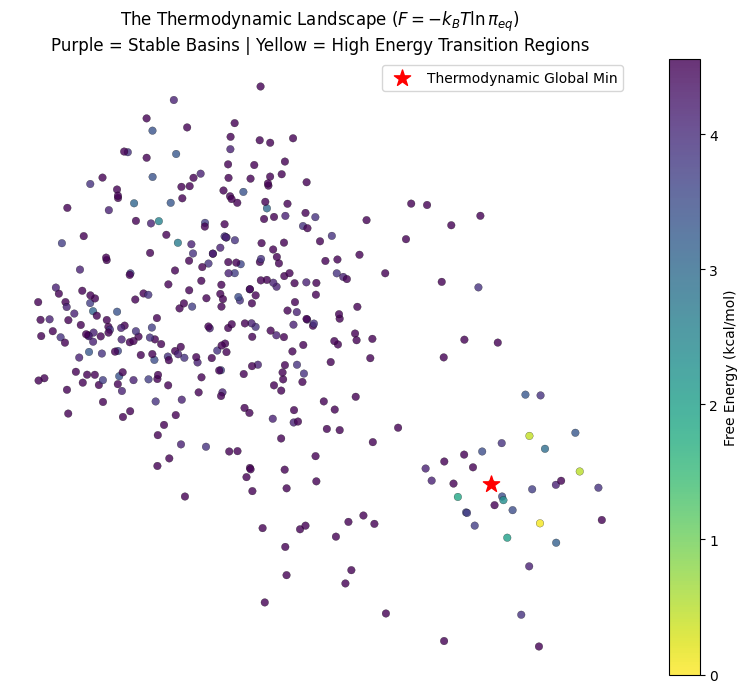

In [280]:
import numpy as np
import scipy.sparse.linalg
import networkx as nx
import matplotlib.pyplot as plt

def identify_thermodynamic_states(G, T_kelvin=300):
    """
    Uses Spectral Graph Theory to find the Equilibrium Distribution
    and identify the True Folded State (Global Free Energy Minimum).
    """
    nodes = list(G.nodes())
    n = len(nodes)
    
    # 1. Build Transition Matrix P
    # Weight by temporal counts (flux)
    A = nx.to_scipy_sparse_array(G, nodelist=nodes, weight='temp_count', format='csr')
    row_sums = np.array(A.sum(axis=1)).flatten()
    row_sums[row_sums == 0] = 1e-10
    
    # P = D^-1 * A
    D_inv = scipy.sparse.diags(1.0 / row_sums)
    P = D_inv @ A
    
    # 2. Compute Stationary Distribution (Eigenvector for lambda=1)
    # We look for the Left Eigenvector: u P = u  => P.T u.T = u.T
    print(f"Solving Eigenvalues for {n} microstates...")
    
    # 'LM' = Largest Magnitude. We want the largest real eigenvalue (which is 1.0)
    try:
        vals, vecs = scipy.sparse.linalg.eigs(P.T, k=3, which='LM')
    except:
        # Fallback for dense/small matrices if sparse solver gets fussy
        print("Switching to dense solver...")
        vals, vecs = np.linalg.eig(P.T.toarray())
        
    # Find the index of the eigenvalue closest to 1.0
    idx = np.argmin(np.abs(vals - 1.0))
    pi = np.real(vecs[:, idx])
    
    # Normalize pi so sum(pi) = 1
    pi = pi / np.sum(pi)
    
    # Handle numerical noise (ensure no negative probs)
    pi = np.maximum(pi, 1e-10)
    
    # 3. Calculate Free Energy Landscape
    # F = -kT ln(pi)
    kB = 0.001987 # kcal/mol/K
    F = -kB * T_kelvin * np.log(pi)
    
    # Shift so the global minimum is at 0 kcal/mol
    F = F - np.min(F)
    
    # 4. Identify States
    # The Folded Node is the Global Minimum of Free Energy (most stable)
    min_idx = np.argmin(F)
    folded_node_id = nodes[min_idx]
    
    # The Unfolded State is often the Start Node, or the most stable state 
    # in the 'other' basin (found via 2nd eigenvector), but for now 
    # let's assume Unfolded is the highest entropy state near the start.
    
    results = {
        'stationary_dist': {n: p for n, p in zip(nodes, pi)},
        'free_energy': {n: f for n, f in zip(nodes, F)},
        'folded_node': folded_node_id,
        'min_energy': F[min_idx]
    }
    
    return results

# --- EXECUTE ---
print("Running Spectral Analysis...")
physics_results = identify_thermodynamic_states(G)

true_folded_node = physics_results['folded_node']
print(f"\n rigorous Analysis Complete:")
print(f"  - True Folded Node ID: {true_folded_node}")
print(f"  - Stability: 0.0 kcal/mol (Reference)")

# Check if it differs from the raw count guess
raw_guess = int(np.argmax(np.bincount(frame_to_uid)))
if true_folded_node != raw_guess:
    print(f"  - NOTE: This differs from the most visited node ({raw_guess}).")
    print("    The rigorous method corrected for sampling bias!")
else:
    print("  - Matches the raw visitation count (Simulation likely well-equilibrated).")

# --- UPDATE GRAPH WITH PHYSICS ---
# Store the Free Energy in the graph nodes for later use
F_map = physics_results['free_energy']
nx.set_node_attributes(G, F_map, 'free_energy')

# --- PLOT FREE ENERGY LANDSCAPE ---
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

# Map F values to the embedding
# (Handle any missing nodes safely)
num_nodes = X_emb.shape[0]
f_colors = [F_map.get(i, 10.0) for i in range(num_nodes)] # Default high energy if missing

sc = ax.scatter(X_emb[:,0], X_emb[:,1], c=f_colors, 
                cmap='viridis_r', # Reversed so Purple is Low Energy (Stable), Yellow is High
                s=30, alpha=0.8, edgecolor='k', linewidth=0.2)

cbar = plt.colorbar(sc, ax=ax, label='Free Energy (kcal/mol)')

# Mark the True Folded State
folded_idx = true_folded_node
ax.scatter(X_emb[folded_idx, 0], X_emb[folded_idx, 1], 
           c='red', s=150, marker='*', label='Thermodynamic Global Min', zorder=10)

ax.set_title("The Thermodynamic Landscape ($F = -k_B T \ln \pi_{eq}$)\nPurple = Stable Basins | Yellow = High Energy Transition Regions")
ax.legend()
plt.axis('off')
plt.show()

In [ ]:
''' DO THE GREEN CONTACT MAPS BIT CHANGES ALIGN WITH DESRES Q '''

In [183]:
import networkx as nx
import numpy as np

map_uid = frame_to_uid
F = len(map_uid)
frame_counts = plotting.ensure_frame_counts(G, map_uid)

start_node = int(map_uid[0]) if 0 <= 0 < F else int(map_uid[0])
folded_node = int(np.argmax(frame_counts))

# Assuming G is your merged graph and shortest_nodes is the path
shortest_nodes = path_m
max_dist = 0
long_edge = None

edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)

def get_edge_info(edge_info, u, v, default=None):
    """
    edge_info: dict produced by temporal_edge_counts:
               keys are (min_node, max_node) -> {'count': int, 'first_frame': int}
    u, v: node ids (ints or convertible to int)
    default: value to return if edge not present
    """
    u_i, v_i = int(u), int(v)
    key = (min(u_i, v_i), max(u_i, v_i))
    return edge_info.get(key, default)

visual_distances_m = []
for i in range(len(shortest_nodes)-1):
    u, v = shortest_nodes[i], shortest_nodes[i+1]
    
    # Calculate visual distance (Euclidean distance on the plot)
    pos_u = np.array(pos[u])
    pos_v = np.array(pos[v])
    visual_dist = np.linalg.norm(pos_u - pos_v)

    info = get_edge_info(edge_info, u, v, default={'count':0,'first_frame':None})
    cnt = info['count'] if info else 0
    
    # Calculate physical distance (Hamming)
    # If using 'ints' from previous steps:
    # val_u, val_v = ints[u], ints[v]
    # hamming_dist = (val_u ^ val_v).bit_count() 
    
    # Or just check graph weight if stored:
    # weight = G[u][v].get('weight', 1) 

    visual_distances_m.append(visual_dist)
    
    print(f"Edge {u}->{v}: Visual Length={visual_dist:.2f}, temporal transition count = {cnt}")

    if visual_dist > max_dist:
        max_dist = visual_dist
        long_edge = (u, v)

print(f"\nLongest visual edge is {long_edge}")

Edge 0->15: Visual Length=0.59, temporal transition count = 255
Edge 15->202: Visual Length=0.40, temporal transition count = 414
Edge 202->270: Visual Length=0.91, temporal transition count = 0
Edge 270->295: Visual Length=0.49, temporal transition count = 0
Edge 295->232: Visual Length=0.56, temporal transition count = 581
Edge 232->228: Visual Length=0.12, temporal transition count = 0
Edge 228->292: Visual Length=0.51, temporal transition count = 0
Edge 292->294: Visual Length=0.95, temporal transition count = 0
Edge 294->321: Visual Length=0.15, temporal transition count = 0
Edge 321->323: Visual Length=0.91, temporal transition count = 0
Edge 323->329: Visual Length=1.07, temporal transition count = 0
Edge 329->326: Visual Length=1.55, temporal transition count = 0
Edge 326->333: Visual Length=1.30, temporal transition count = 629
Edge 333->325: Visual Length=0.31, temporal transition count = 0
Edge 325->328: Visual Length=0.90, temporal transition count = 2317
Edge 328->337: Vis

In [252]:
import networkx as nx
import numpy as np

map_uid = frame_to_uid
F = len(map_uid)
frame_counts = plotting.ensure_frame_counts(G, map_uid)

start_node = int(map_uid[0]) if 0 <= 0 < F else int(map_uid[0])
folded_node = int(np.argmax(frame_counts))

# Assuming G is your merged graph and shortest_nodes is the path
shortest_nodes = nx.shortest_path(G, source=start_node, target=folded_node)

max_dist = 0
long_edge = None

edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)

def get_edge_info(edge_info, u, v, default=None):
    """
    edge_info: dict produced by temporal_edge_counts:
               keys are (min_node, max_node) -> {'count': int, 'first_frame': int}
    u, v: node ids (ints or convertible to int)
    default: value to return if edge not present
    """
    u_i, v_i = int(u), int(v)
    key = (min(u_i, v_i), max(u_i, v_i))
    return edge_info.get(key, default)

visual_distances_t = []
for i in range(len(shortest_nodes)-1):
    u, v = shortest_nodes[i], shortest_nodes[i+1]
    
    # Calculate visual distance (Euclidean distance on the plot)
    pos_u = np.array(pos[u])
    pos_v = np.array(pos[v])
    visual_dist = np.linalg.norm(pos_u - pos_v)

    info = get_edge_info(edge_info, u, v, default={'count':0,'first_frame':None})
    cnt = info['count'] if info else 0
    
    # Calculate physical distance (Hamming)
    # If using 'ints' from previous steps:
    # val_u, val_v = ints[u], ints[v]
    # hamming_dist = (val_u ^ val_v).bit_count() 
    
    # Or just check graph weight if stored:
    # weight = G[u][v].get('weight', 1) 

    visual_distances_t.append(visual_dist)
    
    print(f"Edge {u}->{v}: Visual Length={visual_dist:.2f}, count={cnt}")

    if visual_dist > max_dist:
        max_dist = visual_dist
        long_edge = (u, v)

print(f"\nLongest visual edge is {long_edge}. Likely a Manifold Edge (Hamming=1).")

Edge 0->5: Visual Length=0.87, count=10
Edge 5->216: Visual Length=0.53, count=590
Edge 216->295: Visual Length=0.93, count=589
Edge 295->228: Visual Length=0.67, count=556
Edge 228->332: Visual Length=6.00, count=619
Edge 332->334: Visual Length=0.89, count=0
Edge 334->337: Visual Length=0.41, count=631

Longest visual edge is (228, 332). Likely a Manifold Edge (Hamming=1).


In [127]:
import numpy as np

def get_bit_flipped(ints, index1, index2, verbose=True):

    val1 = ints[index1]
    val2 = ints[index2]

    # XOR finds the bit that is different
    diff = val1 ^ val2
    bit_pos = diff.bit_length() - 1

    if verbose:
        print(f"Node {index1} has bit {bit_pos}: {'YES' if (val1 & (1<<bit_pos)) else 'NO'}")
        print(f"Node {index2} has bit {bit_pos}: {'YES' if (val2 & (1<<bit_pos)) else 'NO'}")
    b1 = (val1 >> bit_pos) & 1
    b2 = (val2 >> bit_pos) & 1

    if b1 == b2:
        flip = "-1"
    elif b1 == 0 and b2 == 1:
        flip = "1"
    else:  # b1 == 1 and b2 == 0
        flip = "0"

    return bit_pos, flip

def get_residue_pair_from_bit(bit_index, n_residues=None, total_bits=None):
    """
    Converts a flat bit index back to (i, j) residue coordinates 
    assuming standard upper-triangle flattening (row-major).
    
    Args:
        bit_index (int): The index of the bit (e.g. 22).
        n_residues (int): The number of residues/beads in the protein.
                          If None, calculated from total_bits.
        total_bits (int): Total length of the bit vector (Mbits).
                          Used to calculate n_residues if not provided.
    """
    # 1. Calculate N if not provided
    if n_residues is None:
        if total_bits is None:
            raise ValueError("Must provide either n_residues or total_bits")
        # Inverse of L = N(N-1)/2  -->  N^2 - N - 2L = 0
        # N = (1 + sqrt(1 + 8L)) / 2
        n_residues = int((1 + np.sqrt(1 + 8 * total_bits)) / 2)

    # 2. Find the pair (i, j)
    # We iterate rows. Row i has (N - 1 - i) elements.
    current_idx = bit_index
    for i in range(n_residues):
        row_length = (n_residues - 1) - i
        if current_idx < row_length:
            # Found the row! The column is just the offset + (i + 1)
            j = i + 1 + current_idx
            return (i, j)
        current_idx -= row_length
        
    raise ValueError(f"Bit index {bit_index} out of bounds for N={n_residues}")

nodes = path_m[8:]
for i in range(len(path_m[8:])-1):
    bit_idx, flip = get_bit_flipped(ints, nodes[i], nodes[i+1])
    res_pair = get_residue_pair_from_bit(bit_idx, n_residues=10)

    print(f"Bit #{bit_idx} corresponds to residue pair: {res_pair}")

Node 294 has bit 6: NO
Node 321 has bit 6: YES
Bit #6 corresponds to residue pair: (0, 7)
Node 321 has bit 7: NO
Node 323 has bit 7: YES
Bit #7 corresponds to residue pair: (0, 8)
Node 323 has bit 8: NO
Node 329 has bit 8: YES
Bit #8 corresponds to residue pair: (0, 9)
Node 329 has bit 16: NO
Node 326 has bit 16: YES
Bit #16 corresponds to residue pair: (1, 9)
Node 326 has bit 22: NO
Node 333 has bit 22: YES
Bit #22 corresponds to residue pair: (2, 8)
Node 333 has bit 6: YES
Node 325 has bit 6: NO
Bit #6 corresponds to residue pair: (0, 7)
Node 325 has bit 27: NO
Node 328 has bit 27: YES
Bit #27 corresponds to residue pair: (3, 7)
Node 328 has bit 12: YES
Node 337 has bit 12: NO
Bit #12 corresponds to residue pair: (1, 5)


In [137]:
import pandas as pd

def shift_rows_right(df, empty_label=""):
    df2 = df.copy()
    df2.insert(0, empty_label, [None] * len(df2))
    return df2

def lists_to_markdown(a, b, row_a="A", row_b="B", shift=False):
    n = max(len(a), len(b))
    cols = [f"step {i}" for i in range(n)]
    df = pd.DataFrame(
        [
            a + [None] * (n - len(a)),
            b + [None] * (n - len(b)),
        ],
        index=[row_a, row_b],
        columns=cols,
    )
    if shift:
        df = shift_rows_right(df, empty_label="start")

    return df.to_markdown()

print(lists_to_markdown(path_m, path_t, "manifold path", "temporal path"))


|               |   step 0 |   step 1 |   step 2 |   step 3 |   step 4 |   step 5 |   step 6 |   step 7 |   step 8 |   step 9 |   step 10 |   step 11 |   step 12 |   step 13 |   step 14 |   step 15 |   step 16 |
|:--------------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|
| manifold path |        0 |       15 |      202 |      270 |      295 |      232 |      228 |      292 |      294 |      321 |       323 |       329 |       326 |       333 |       325 |       328 |       337 |
| temporal path |        0 |        5 |      216 |      295 |      228 |      332 |      334 |      337 |      nan |      nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan |


<Axes: >

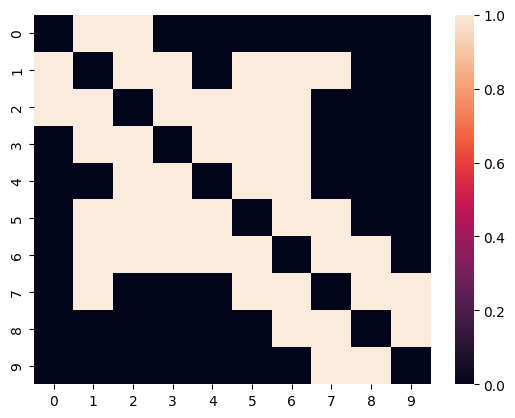

In [85]:
import numpy as np
from math import isclose, sqrt

def n_bits_for_N(N):
    return N * (N - 1) // 2

def infer_N_from_bits(n_bits):
    # solve N(N-1)/2 = n_bits  -> N^2 - N - 2*n_bits = 0
    N = int((1 + sqrt(1 + 8 * n_bits)) / 2)
    if n_bits_for_N(N) != n_bits:
        raise ValueError("n_bits is not a triangular number")
    return N

def upper_bits_to_full_matrix(bits, N=None):
    """
    bits: 1D iterable/array of 0/1 of length M = N(N-1)/2 (row-major upper triangle)
          bits[k] corresponds to pair (i,j) produced by scanning rows:
            (0,1),(0,2),...,(0,N-1),(1,2),(1,3),...,(N-2,N-1)
    N: number of residues (optional if bits length gives N)
    Returns: (N,N) numpy array, dtype=int (0/1), symmetric, diagonal 0.
    """
    bits = np.asarray(bits, dtype=int).ravel()
    M = bits.size
    if N is None:
        N = infer_N_from_bits(M)
    else:
        if n_bits_for_N(N) != M:
            raise ValueError("Length of bits does not match provided N")

    mat = np.zeros((N, N), dtype=int)

    # Build row/col lists for the strict upper triangle in the same row-major order
    rows = []
    cols = []
    for i in range(N):
        for j in range(i + 1, N):
            rows.append(i)
            cols.append(j)
    rows = np.array(rows, dtype=int)
    cols = np.array(cols, dtype=int)

    # assign bits
    mat[rows, cols] = bits
    mat[cols, rows] = bits  # symmetric
    return mat

def int_to_contact_matrix(x, N=None, n_bits=None, lsb_first=True):
    """
    x: integer encoding the upper-triangle bits
    N: number of residues (optional)
    n_bits: explicit number of upper-triangle bits (optional). If provided, overrides infer from N.
    lsb_first: if True (default), bit_index 0 is the least-significant bit of x.
               If False, bit_index 0 is the most-significant bit of the n_bits-length representation.
    Returns: (N,N) numpy int matrix symmetric.
    """
    if n_bits is None:
        if N is None:
            raise ValueError("Provide N or n_bits")
        n_bits = n_bits_for_N(N)
    else:
        # infer N if not given
        if N is None:
            N = infer_N_from_bits(n_bits)

    # extract bits into length-n_bits array in flattened row-major order
    # bit k corresponds to flattened index k.
    bits = np.zeros(n_bits, dtype=int)
    if lsb_first:
        # bit 0 is LSB
        for k in range(n_bits):
            bits[k] = (x >> k) & 1
    else:
        # MSB-first: map flattened index k -> integer bit at position (n_bits-1-k)
        for k in range(n_bits):
            bits[k] = (x >> (n_bits - 1 - k)) & 1

    return upper_bits_to_full_matrix(bits, N=N)

import seaborn as sns 

N = 10
M = n_bits_for_N(N)  # 45
# set bit 22 (flattened index 22) using LSB-first integer
mat = int_to_contact_matrix(ints[228], N=N, lsb_first=True)
sns.heatmap(mat)
# Verify the pair:
#active_pairs = np.argwhere(np.triu(mat, k=1) == 1)
#print(active_pairs)   # should show [[2, 8]]  -> pair (2,8) 0-based



<Axes: >

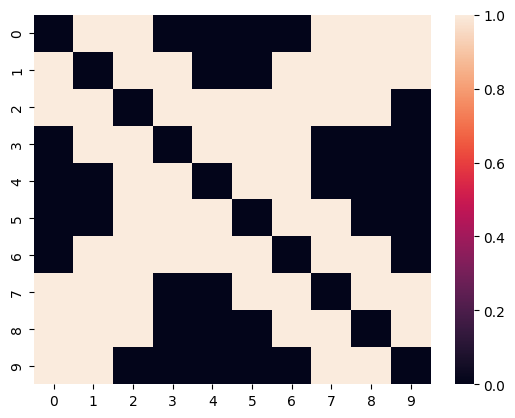

In [86]:
N = 10
M = n_bits_for_N(N)  # 45
# set bit 22 (flattened index 22) using LSB-first integer
mat = int_to_contact_matrix(ints[332], N=N, lsb_first=True)
sns.heatmap(mat)

In [199]:
import numpy as np
import pandas as pd
import mdtraj

def lists_to_markdown_rows_full_nan(a, b, row_a="manifold", row_b="merged", tablefmt="github"):
    n = max(len(a), len(b))

    # pad BOTH rows fully with np.nan
    row1 = list(a) + [np.nan] * (n - len(a))
    row2 = list(b) + [np.nan] * (n - len(b))

    df = pd.DataFrame(
        {
            "start": ["", ""],                     # spacer column
            **{f"step {i+1}": [row1[i], row2[i]] for i in range(n)}
        },
        index=[row_a, row_b],
    )

    # blank index header (top-left cell)
    df.index.name = ""

    return df.to_markdown(tablefmt=tablefmt)

pdb = "/Users/kebl8116-admin/Projects/origami/data/Chignolin/xtc/nvt_prod_1_protein.pdb"
xtc = "/Users/kebl8116-admin/Projects/origami/data/Chignolin/xtc/nvt_prod_1_protein.xtc"
traj = mdtraj.load(xtc, top=pdb)

residues = list(traj.topology.residues)

path_m_res_flips = []
node_pairs_m = []
res_pairs_m = []
flip_dirs_m = []
for i in range(len(path_m)-1):
    bit_idx, flip = get_bit_flipped(ints, path_m[i], path_m[i+1], verbose=False)
    res_pair = get_residue_pair_from_bit(bit_idx, n_residues=10)
    res1 = str(residues[res_pair[0]])[:3] + str(res_pair[0])
    res2 = str(residues[res_pair[1]])[:3] + str(res_pair[1])
    node_pairs_m.append((path_m[i], path_m[i+1]))
    res_pairs_m.append((res1, res2))
    flip_dirs_m.append("+" if flip == "1" else "-")
    path_m_res_flips.append(f"{res1}, {res2}, flip={flip}")

path_t_res_flips = []
node_pairs_t = []
res_pairs_t = []
flip_dirs_t = []
for i in range(len(path_t)-1):
    bit_idx, flip = get_bit_flipped(ints, path_t[i], path_t[i+1], verbose=False)
    res_pair = get_residue_pair_from_bit(bit_idx, n_residues=10)
    res1 = str(residues[res_pair[0]])[:3] + str(res_pair[0])
    res2 = str(residues[res_pair[1]])[:3] + str(res_pair[1])
    node_pairs_t.append((path_m[i], path_m[i+1]))
    res_pairs_t.append((res1, res2))
    flip_dirs_t.append("+" if flip == "1" else "-")
    path_t_res_flips.append(f"{res1}, {res2}, flip={flip}")

print(lists_to_markdown_rows_full_nan(path_m_res_flips, path_t_res_flips, "manifold path", "temporal path"))

|               | start   | step 1             | step 2             | step 3             | step 4             | step 5             | step 6             | step 7             | step 8             | step 9             | step 10            | step 11            | step 12            | step 13            | step 14            | step 15            | step 16            |
|---------------|---------|--------------------|--------------------|--------------------|--------------------|--------------------|--------------------|--------------------|--------------------|--------------------|--------------------|--------------------|--------------------|--------------------|--------------------|--------------------|--------------------|
| manifold path |         | PRO3, GLY6, flip=1 | ASP2, GLY6, flip=1 | ASP2, THR5, flip=1 | TYR1, GLY6, flip=1 | TYR1, THR7, flip=1 | TYR1, THR5, flip=1 | ASP2, THR7, flip=1 | TYR1, TRP8, flip=1 | TYR0, THR7, flip=1 | TYR0, TRP8, flip=1 | TYR0, TYR9, flip=1 | TYR1, TYR9, f

In [217]:
import pandas as pd 

df_m = pd.DataFrame({
    "node pair": [f"{x[0]}, {x[1]}" for x in node_pairs_m],
    "residue pair": [f"{x[0]}, {x[1]}" for x in res_pairs_m],
    "flip direction": flip_dirs_m,
    "edge distance": visual_distances_m
    })

tablefmt = "github"
print(df_m.to_markdown(tablefmt=tablefmt))

|    | node pair   | residue pair   | flip direction   |   edge distance |
|----|-------------|----------------|------------------|-----------------|
|  0 | 0, 15       | PRO3, GLY6     | +                |        0.593338 |
|  1 | 15, 202     | ASP2, GLY6     | +                |        0.404784 |
|  2 | 202, 270    | ASP2, THR5     | +                |        0.909079 |
|  3 | 270, 295    | TYR1, GLY6     | +                |        0.486236 |
|  4 | 295, 232    | TYR1, THR7     | +                |        0.564781 |
|  5 | 232, 228    | TYR1, THR5     | +                |        0.11616  |
|  6 | 228, 292    | ASP2, THR7     | +                |        0.510957 |
|  7 | 292, 294    | TYR1, TRP8     | +                |        0.947332 |
|  8 | 294, 321    | TYR0, THR7     | +                |        0.154547 |
|  9 | 321, 323    | TYR0, TRP8     | +                |        0.908708 |
| 10 | 323, 329    | TYR0, TYR9     | +                |        1.07102  |
| 11 | 329, 326    | TYR1

In [219]:
df_m.sort_values(by='edge distance', ascending=False).reset_index(drop=True)

node pair residue pair flip direction  edge distance
0   329, 326   TYR1, TYR9              +       1.549323
1   326, 333   ASP2, TRP8              +       1.297203
2   323, 329   TYR0, TYR9              +       1.071021
3   292, 294   TYR1, TRP8              +       0.947332
4   202, 270   ASP2, THR5              +       0.909079
5   321, 323   TYR0, TRP8              +       0.908708
6   325, 328   PRO3, THR7              +       0.895682
7      0, 15   PRO3, GLY6              +       0.593338
8   295, 232   TYR1, THR7              +       0.564781
9   228, 292   ASP2, THR7              +       0.510957
10  270, 295   TYR1, GLY6              +       0.486236
11   15, 202   ASP2, GLY6              +       0.404784
12  328, 337   TYR1, THR5              -       0.341546
13  333, 325   TYR0, THR7              -       0.313396
14  294, 321   TYR0, THR7              +       0.154547
15  232, 228   TYR1, THR5              +       0.116160

In [93]:
def hamming_dist_int(a: int, b: int) -> int:
    return (a ^ b).bit_count()

def node_pair_hamming_from_ints(node_a, node_b, ints):
    a = int(ints[node_a])
    b = int(ints[node_b])
    return a, b, hamming_dist_int(a, b)

def node_pair_hamming_from_graph(node_a, node_b, G, node_int_attr='int'):
    a = int(G.nodes[node_a][node_int_attr])
    b = int(G.nodes[node_b][node_int_attr])
    return a, b, hamming_dist_int(a, b)

def inspect_shortest_path(G, start, target, ints=None, node_int_attr='int'):
    path = nx.shortest_path(G, source=start, target=target)
    pairs = [(path[i], path[i+1]) for i in range(len(path)-1)]
    results = []
    for u, v in pairs:
        if ints is not None:
            a, b, d = node_pair_hamming_from_ints(u, v, ints)
        else:
            a, b, d = node_pair_hamming_from_graph(u, v, G, node_int_attr=node_int_attr)
        results.append({'edge':(u,v), 'hamming':d, 'a':a, 'b':b})
    # endpoint total hamming
    if ints is not None:
        _, _, total = node_pair_hamming_from_ints(start, target, ints)
    else:
        _, _, total = node_pair_hamming_from_graph(start, target, G, node_int_attr=node_int_attr)
    return path, results, total

path, edge_info, total = inspect_shortest_path(G, start_node, folded_node, ints=ints)
print("Path:", path)
for r in edge_info:
    print(r)
print("Total endpoint Hamming:", total)


Path: [0, 5, 216, 295, 228, 332, 334, 337]
{'edge': (0, 5), 'hamming': 1, 'a': 32541944186371, 'b': 32541944710659}
{'edge': (5, 216), 'hamming': 1, 'a': 32541944710659, 'b': 32542011819523}
{'edge': (216, 295), 'hamming': 2, 'a': 32542011819523, 'b': 32542012876291}
{'edge': (295, 228), 'hamming': 2, 'a': 32542012876291, 'b': 32542012896771}
{'edge': (228, 332), 'hamming': 8, 'a': 32542012896771, 'b': 32542019282883}
{'edge': (332, 334), 'hamming': 1, 'a': 32542019282883, 'b': 32542153500611}
{'edge': (334, 337), 'hamming': 1, 'a': 32542153500611, 'b': 32542153500547}
Total endpoint Hamming: 12


In [96]:
'''  Comparison between shortest path hamming distance and geodesic '''



'  Comparison between shortest path hamming distance and geodesic '

In [176]:
import py3Dmol

def view_wormhole_contact(pdb_file, res_index_a, res_index_b, offset=1):
    """
    Visualizes a specific contact pair on a protein structure.
    
    Args:
        pdb_file (str): Path to your PDB file (or PDB ID).
        res_index_a (int): 0-based index of first residue (from your calculation).
        res_index_b (int): 0-based index of second residue.
        offset (int): conversion from 0-based array to PDB numbering (usually 1).
    """
    
    # Convert 0-based indices to PDB IDs
    pdb_res_a = res_index_a + offset
    pdb_res_b = res_index_b + offset
    
    # Selection string for py3Dmol (e.g., "3,9")
    sel_str = f"{pdb_res_a},{pdb_res_b}"
    
    print(f"Visualizing Python indices {res_index_a} & {res_index_b}")
    print(f"Mapping to PDB Residue IDs {pdb_res_a} & {pdb_res_b}")

    # Initialize Viewer
    view = py3Dmol.view(width=800, height=600)
    
    # Load Data
    # If using a local file, read it into a string
    try:
        with open(pdb_file, 'r') as f:
            pdb_data = f.read()
        view.addModel(pdb_data, 'pdb')
    except FileNotFoundError:
        print(f"File {pdb_file} not found. Trying as PDB ID...")
        view.addModel(pdb_file, 'pdb') # Try loading as simple ID if file fails
        
    # 1. Base Style: Cartoon (White/Grey or Spectrum)
    # We make it translucent (opacity 0.7) so the sticks pop out more
    view.setStyle({'cartoon': {'color': 'white', 'opacity': 0.8}})
    
    # 2. Highlight Style: Sticks for the specific pair
    # We select ONLY the two residues involved
    view.addStyle({'resi': [pdb_res_a, pdb_res_b]}, 
                  {'stick': {'colorscheme': 'redCarbon', 'radius': 0.3}})
    
    # 3. Label the residues (Optional but helpful)
    view.addLabel(f"Res {pdb_res_a}", {'fontSize':12, 'fontColor':'black', 'backgroundColor':'white'}, 
                  {'resi': pdb_res_a})
    view.addLabel(f"Res {pdb_res_b}", {'fontSize':12, 'fontColor':'black', 'backgroundColor':'white'}, 
                  {'resi': pdb_res_b})

    # Zoom to center
    view.zoomTo()
    
    # Show
    return view

# --- RUN THE VISUALIZATION ---

# 1. Set the residues you found (0-based)
res1 = 0
res2 = 7
pdb = "/Users/kebl8116-admin/Projects/origami/data/Chignolin/5awl.pdb"
# 2. Run the viewer
# Replace 'structure.pdb' with your actual filename
view = view_wormhole_contact(pdb, res1, res2, offset=1)
view.show()

Visualizing Python indices 0 & 7
Mapping to PDB Residue IDs 1 & 8


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

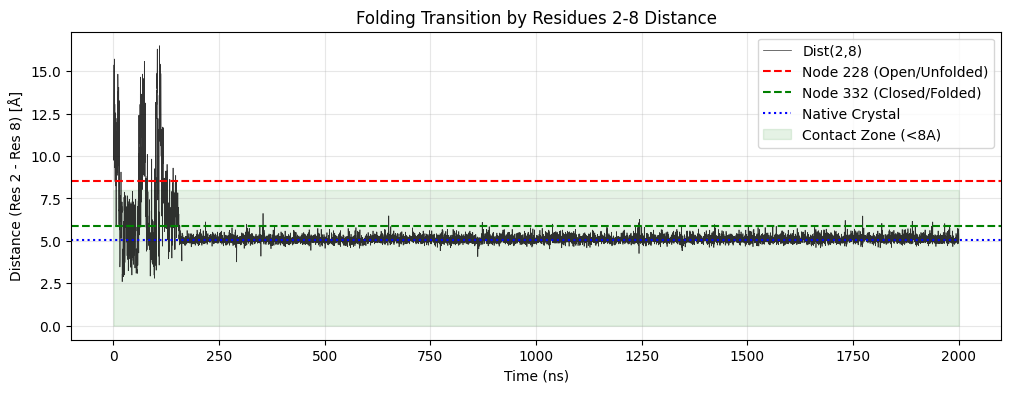

In [203]:
import mdtraj as md
import matplotlib.pyplot as plt

# 1. Load trajectory
traj = md.load(xtc, top=pdb)

# 2. Compute distance of the critical pair (2, 8)
# Note: mdtraj uses 0-based indexing
pairs = [[2, 8]]
distances = md.compute_contacts(traj, contacts=pairs)[0][:, 0] * 10  # Convert nm to Angstroms

# 3. Plot
plt.figure(figsize=(12, 4))
plt.plot(traj.time * 2 / 1000, distances, color='black', linewidth=0.5, alpha=0.8, label='Dist(2,8)')

# Add threshold lines based on your findings
plt.axhline(y=8.55, color='red', linestyle='--', label='Node 228 (Open/Unfolded)')
plt.axhline(y=5.90, color='green', linestyle='--', label='Node 332 (Closed/Folded)')
plt.axhline(y=5.06, color='blue', linestyle=':', label='Native Crystal')

# Aesthetic details
plt.fill_between(traj.time * 2 / 1000, 0, 8.0, color='green', alpha=0.1, label='Contact Zone (<8A)')
plt.xlabel("Time (ns)")
plt.ylabel("Distance (Res 2 - Res 8) [Å]")
plt.title("Folding Transition by Residues 2-8 Distance")
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.savefig("images/transition_state_contact_distance.png")
plt.show()

In [ ]:
import numpy as np
import networkx as nx

def detect_transition_edges(G, pos, shortest_path_nodes, threshold_sigma=2.0):
    """
    Identifies 'Transition Edges' defined as 1-bit steps that are 
    visually stretched significantly more than average.
    """
    # 1. Collect statistics for ALL 1-bit edges in the path
    # (or you could sample the whole graph for a baseline)
    strains = []
    edges_info = []

    for i in range(len(shortest_path_nodes) - 1):
        u = shortest_path_nodes[i]
        v = shortest_path_nodes[i+1]
        
        # Physical Distance (Hamming) - implicitly 1 for manifold edges
        # If your graph has weights, check them. Assuming unweighted or weight=1.
        physical_dist = 1.0 
        
        # Visual Distance (Euclidean)
        pos_u = np.array(pos[u])
        pos_v = np.array(pos[v])
        visual_dist = np.linalg.norm(pos_u - pos_v)
        
        # Calculate Strain
        strain = visual_dist / physical_dist
        
        strains.append(strain)
        edges_info.append((u, v, strain))

    strains = np.array(strains)
    
    # 2. Define the Baseline (Average step size)
    mean_strain = np.mean(strains)
    std_strain = np.std(strains)
    
    # 3. Identify Outliers
    print(f"Average Edge Length: {mean_strain:.3f} +/- {std_strain:.3f}")
    print("-" * 40)
    
    transition_candidates = []
    
    for u, v, strain in edges_info:
        # Check if this edge is an anomaly
        z_score = (strain - mean_strain) / std_strain if std_strain > 0 else 0
        
        if z_score > threshold_sigma:
            print(f"*** TRANSITION DETECTED ***")
            print(f"Edge {u} -> {v}")
            print(f"Visual Length: {strain:.3f} (Z-score: {z_score:.1f})")
            transition_candidates.append((u, v))
        elif strain > mean_strain:
            # Just print high-ish ones
            print(f"Edge {u} -> {v}: {strain:.3f}")
            
    return transition_candidates

# --- Usage ---
# Assuming 'G' is your merged graph and 'pos' is your 2D layout
path = nx.shortest_path(G, source=start_node, target=folded_node)
transitions = detect_transition_edges(G, pos, path)

In [247]:
'''
DESRES Q-value function
'''

import mdtraj as md
import numpy as np

def identify_native_contacts(folded_traj_or_struct, 
                             selection="name CA", 
                             min_seq_sep=3, 
                             threshold_dist_nm=0.8, 
                             occupancy_threshold=0.80):
    """
    Identifies native contacts based on the protocol:
    "Contacts between residues separated by at least 7 residues... 
    closer than 10 A (1.0 nm) for more than 80% of the time in the folded state."
    
    Parameters:
    -----------
    folded_traj_or_struct : mdtraj.Trajectory
        A trajectory of the 'folded state' (e.g., the most populated cluster) 
        OR a single native PDB structure.
    selection : str
        Atom selection query (default: C-alpha).
    min_seq_sep : int
        Minimum residue sequence separation (|i-j| >= 7).
    threshold_dist_nm : float
        Distance cutoff in nanometers (10 Angstroms = 1.0 nm).
    occupancy_threshold : float
        Fraction of frames the contact must be present (0.80). 
        If a single structure is provided, this is ignored (assumed 1.0).

    Returns:
    --------
    native_pairs : np.ndarray
        Array of shape (N, 2) containing atom indices of native contacts.
    native_dists : np.ndarray
        Array of shape (N,) containing the reference distances (r0) for these pairs.
    """
    
    # 1. Select Atoms (C-alpha)
    atom_indices = folded_traj_or_struct.topology.select(selection)
    
    # 2. Create all possible pairs satisfying sequence separation
    pairs = []
    # Map atom index back to residue index to check sequence separation
    atom_to_res = {
        atom.index: atom.residue.index 
        for atom in folded_traj_or_struct.topology.atoms 
        if atom.index in atom_indices
    }
    
    sorted_indices = sorted(list(atom_indices))
    for i in range(len(sorted_indices)):
        for j in range(i + 1, len(sorted_indices)):
            idx_i = sorted_indices[i]
            idx_j = sorted_indices[j]
            
            res_i = atom_to_res[idx_i]
            res_j = atom_to_res[idx_j]
            
            if abs(res_i - res_j) >= min_seq_sep:
                pairs.append([idx_i, idx_j])
                
    if not pairs:
        raise ValueError("No pairs found satisfying sequence separation criteria.")
        
    pairs = np.array(pairs)

    # 3. Compute distances across the provided folded trajectory/structure
    # Result shape: (n_frames, n_pairs)
    dists = md.compute_distances(folded_traj_or_struct, pairs)

    # 4. Filter by Occupancy (10 Angstroms rule)
    # Check how often dist < 1.0 nm
    is_contact = dists < threshold_dist_nm
    occupancy = np.mean(is_contact, axis=0)
    
    # Keep pairs where occupancy > 80%
    # If it's a single structure, occupancy will be 0 or 1.
    keep_mask = occupancy > occupancy_threshold
    
    native_pairs = pairs[keep_mask]
    
    # Define r0 (native distance) as the average distance in the folded ensemble
    # or the static distance if a single PDB is used.
    native_dists = np.mean(dists[:, keep_mask], axis=0)
    
    print(f"Identified {len(native_pairs)} native contacts from {len(pairs)} candidates.")
    return native_pairs, native_dists

def compute_Q(traj, native_pairs, native_dists_r0, beta=50.0, lambda_const=1.2):
    """
    Calculates the reaction coordinate Q(t) for a trajectory.
    
    Formula: Q(t) = (1/N) * Sum( 1 / (1 + exp(beta * (r(t) - lambda * r0))) )
    
    Parameters:
    -----------
    traj : mdtraj.Trajectory
        The simulation trajectory to analyze.
    native_pairs : np.ndarray
        Indices of native contacts (from identify_native_contacts).
    native_dists_r0 : np.ndarray
        Reference distances (r0) for the native pairs.
    beta : float
        Smoothing parameter in nm^-1. Default 50 nm^-1 (approx 5 Angstrom^-1).
    lambda_const : float
        Tolerance factor. Default 1.2. 
        (Contact is 'formed' if dist is within ~1.2x of native dist).

    Returns:
    --------
    Q : np.ndarray
        Array of Q values for each frame in the trajectory (0.0 to 1.0).
    """
    
    if len(native_pairs) == 0:
        return np.zeros(traj.n_frames)

    # 1. Compute distances for the native pairs in the new trajectory
    # Shape: (n_frames, n_contacts)
    r_t = md.compute_distances(traj, native_pairs)
    
    # 2. Calculate the sigmoid argument: beta * (r(t) - lambda * r0)
    # native_dists_r0 must be broadcasted to match n_frames
    val = beta * (r_t - lambda_const * native_dists_r0)
    
    # 3. Apply Sigmoid
    # Q_ij = 1 / (1 + exp(val))
    Q_ij = 1.0 / (1.0 + np.exp(val))
    
    # 4. Average over all contacts for each frame
    Q_t = np.mean(Q_ij, axis=1)
    
    return Q_t

native_struct = md.load("/Users/kebl8116-admin/Projects/origami/data/Chignolin/5awl.pdb")
        
# 2. Identify Contacts
# Note: If you have a trajectory of the folded state, pass that instead of 'native_struct'
# to strictly adhere to the " > 80% time" rule.
pairs, r0 = identify_native_contacts(native_struct)

# 3. Load Simulation Trajectory
pdb = "/Users/kebl8116-admin/Projects/origami/data/Chignolin/xtc/nvt_prod_1_protein.pdb"
xtc = "/Users/kebl8116-admin/Projects/origami/data/Chignolin/xtc/nvt_prod_1_protein.xtc"
traj = md.load(xtc, top=pdb)

# 4. Calculate Q
q_values = compute_Q(traj, pairs, r0)

print(f"Computed Q for {traj.n_frames} frames.")
print(f"Mean Q: {np.mean(q_values):.4f}")


Identified 12 native contacts from 28 candidates.
Computed Q for 10001 frames.
Mean Q: 0.7818


/var/folders/bd/1_0prvlx06lcc135mt668_3r0000gs/T/ipykernel_27590/135618178.py:131: RuntimeWarning: overflow encountered in exp
  Q_ij = 1.0 / (1.0 + np.exp(val))


In [248]:
import mdtraj as md
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def compute_contact_matrix(traj, native_pairs, native_dists_r0, beta=50.0, lambda_const=1.2):
    """
    Computes the individual q_ij values for every contact at every frame.
    
    Returns:
    --------
    q_matrix : np.ndarray
        Shape (n_frames, n_contacts). Values between 0.0 and 1.0.
    """
    # 1. Compute distances for the native pairs
    r_t = md.compute_distances(traj, native_pairs)
    
    # 2. Calculate Sigmoid for each contact individually
    # val shape: (n_frames, n_contacts)
    val = beta * (r_t - lambda_const * native_dists_r0)
    q_matrix = 1.0 / (1.0 + np.exp(val))
    
    return q_matrix

def analyze_contributions(q_matrix, native_pairs, traj_topology):
    """
    Converts the raw matrix into a readable DataFrame describing which 
    residues are involved in the most stable contacts.
    """
    # 1. Calculate Stability (Mean occupancy of each contact)
    # Average over all frames provided
    stability = np.mean(q_matrix, axis=0)
    
    # 2. Map back to residue names for readability
    data = []
    for k, (atom_i, atom_j) in enumerate(native_pairs):
        res_i = traj_topology.atom(atom_i).residue
        res_j = traj_topology.atom(atom_j).residue
        
        data.append({
            #'Contact_ID': k,
            # 'Residue_A': f"{res_i.name}{res_i.index}",
            # 'Residue_B': f"{res_j.name}{res_j.index}",
            # 'Seq_Separation': abs(res_i.index - res_j.index),
            "residue pair": f"{res_i.name}{res_i.index}, {res_j.name}{res_j.index}",
            'stability': stability[k] # 0.0 to 1.0
        })
        
    df = pd.DataFrame(data)
    
    # Sort by stability (most stable first)
    df_sorted = df.sort_values(by='stability', ascending=False).reset_index(drop=True)
    
    return df_sorted

# --- Example Usage ---
# Assuming 'traj', 'pairs', and 'r0' are defined from previous steps
q_matrix = compute_contact_matrix(traj, pairs, r0)
df_contacts = analyze_contributions(q_matrix, pairs, traj.topology)

tablefmt = "github"
print(df_contacts.to_markdown(tablefmt=tablefmt))

|    | residue pair   |   stability |
|----|----------------|-------------|
|  0 | ASP2, TRP8     |   0.927066  |
|  1 | TYR0, TYR9     |   0.923661  |
|  2 | TYR1, TYR9     |   0.923486  |
|  3 | ASP2, THR7     |   0.918041  |
|  4 | ASP2, THR5     |   0.910078  |
|  5 | TYR1, TRP8     |   0.895284  |
|  6 | TYR0, TRP8     |   0.866649  |
|  7 | TYR1, THR7     |   0.801856  |
|  8 | ASP2, GLY6     |   0.75156   |
|  9 | PRO3, GLY6     |   0.688705  |
| 10 | ASP2, TYR9     |   0.687265  |
| 11 | TYR1, GLY6     |   0.0880556 |


/var/folders/bd/1_0prvlx06lcc135mt668_3r0000gs/T/ipykernel_27590/2081735194.py:22: RuntimeWarning: overflow encountered in exp
  q_matrix = 1.0 / (1.0 + np.exp(val))


In [249]:
shared = df_m.merge(df_contacts, on='residue pair', suffixes=('_manifold','_temporal'), how='inner')
print(shared.to_markdown(tablefmt=tablefmt))

|    | node pair   | residue pair   | flip direction   |   edge distance |   stability |
|----|-------------|----------------|------------------|-----------------|-------------|
|  0 | 0, 15       | PRO3, GLY6     | +                |        0.593338 |   0.688705  |
|  1 | 15, 202     | ASP2, GLY6     | +                |        0.404784 |   0.75156   |
|  2 | 202, 270    | ASP2, THR5     | +                |        0.909079 |   0.910078  |
|  3 | 270, 295    | TYR1, GLY6     | +                |        0.486236 |   0.0880556 |
|  4 | 295, 232    | TYR1, THR7     | +                |        0.564781 |   0.801856  |
|  5 | 228, 292    | ASP2, THR7     | +                |        0.510957 |   0.918041  |
|  6 | 292, 294    | TYR1, TRP8     | +                |        0.947332 |   0.895284  |
|  7 | 321, 323    | TYR0, TRP8     | +                |        0.908708 |   0.866649  |
|  8 | 323, 329    | TYR0, TYR9     | +                |        1.07102  |   0.923661  |
|  9 | 329, 326    | 

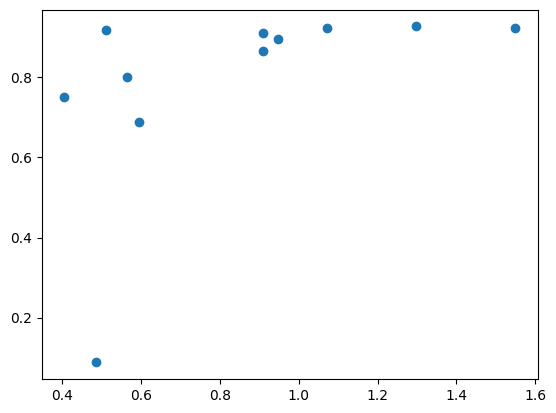

In [250]:
plt.scatter(shared["edge distance"], shared["stability"])

In [57]:
import numpy as np
import pandas as pd

def get_transition_paths(q_raw, time_step_ns=0.2, window_ns=10.0, 
                         q_folded=0.90, q_unfolded=0.10):
    """
    Identifies transition paths using the dual-cutoff method from 
    Lindorff-Larsen et al. (Science 2011).

    Parameters:
    -----------
    q_raw : np.ndarray
        The raw Q(t) values calculated for each frame (0.0 to 1.0).
    time_step_ns : float
        The time elapsed between frames in nanoseconds.
    window_ns : float
        The smoothing window size in nanoseconds (Default: 10 ns).
    q_folded : float
        Threshold for folded state (Default: > 0.90).
    q_unfolded : float
        Threshold for unfolded state (Default: < 0.10).

    Returns:
    --------
    transitions : list of dict
        A list of dictionaries, where each dict represents a transition event:
        {
            'type': 'folding' or 'unfolding',
            'start_frame': int,
            'end_frame': int,
            'duration_ns': float
        }
    q_smoothed : np.ndarray
        The smoothed trajectory used for the analysis.
    """

    # 1. Apply Smoothing (Running Average)
    # Convert window time to number of frames (must be odd integer ideally)
    window_frames = int(window_ns / time_step_ns)
    if window_frames < 1: 
        window_frames = 1
        
    # Use pandas for easy rolling average; center=True avoids phase shift
    q_series = pd.Series(q_raw)
    q_smooth = q_series.rolling(window=window_frames, center=True).mean().fillna(q_series)
    q_smooth = q_smooth.values

    # 2. Assign Stable States
    #  1 = Folded
    # -1 = Unfolded
    #  0 = Intermediate/Transition
    state_traj = np.zeros(len(q_smooth), dtype=int)
    state_traj[q_smooth > q_folded] = 1
    state_traj[q_smooth < q_unfolded] = -1

    # 3. Identify Valid Transitions
    # We only care about frames where the system is CLEARLY in a stable state.
    # We find indices of frames that are either 1 or -1.
    stable_indices = np.where(state_traj != 0)[0]
    
    if len(stable_indices) < 2:
        print("Trajectory does not visit enough stable states to identify transitions.")
        return [], q_smooth

    # Check for switches between distinct stable states
    # stable_states_sequence is the sequence of 1s and -1s visiting over time
    stable_states_sequence = state_traj[stable_indices]
    
    transitions = []
    
    # Iterate through the sequence of stable frames
    for k in range(len(stable_indices) - 1):
        curr_state = stable_states_sequence[k]
        next_state = stable_states_sequence[k+1]
        
        # If the state changes (e.g., 1 to -1 or -1 to 1), we found a transition block
        if curr_state != next_state:
            # The transition path is the segment between these two stable points.
            # start_idx: the LAST frame in the previous stable state
            # end_idx: the FIRST frame in the new stable state
            start_idx = stable_indices[k]
            end_idx = stable_indices[k+1]
            
            # Determine type
            t_type = "unfolding" if (curr_state == 1 and next_state == -1) else "folding"
            
            transitions.append({
                'type': t_type,
                'start_frame': start_idx,
                'end_frame': end_idx,
                'duration_ns': (end_idx - start_idx) * time_step_ns
            })

    print(f"Found {len(transitions)} valid transition paths.")
    return transitions, q_smooth

# Run Analysis
events, q_smooth = get_transition_paths(q_values, time_step_ns=1)

for i, event in enumerate(events):
    print(f"Event {i+1}: {event['type'].upper()}")
    print(f"  Frames: {event['start_frame']} -> {event['end_frame']}")
    print(f"  Duration: {event['duration_ns']/5:.2f} ns")

Found 1 valid transition paths.
Event 1: FOLDING
  Frames: 741 -> 795
  Duration: 10.80 ns


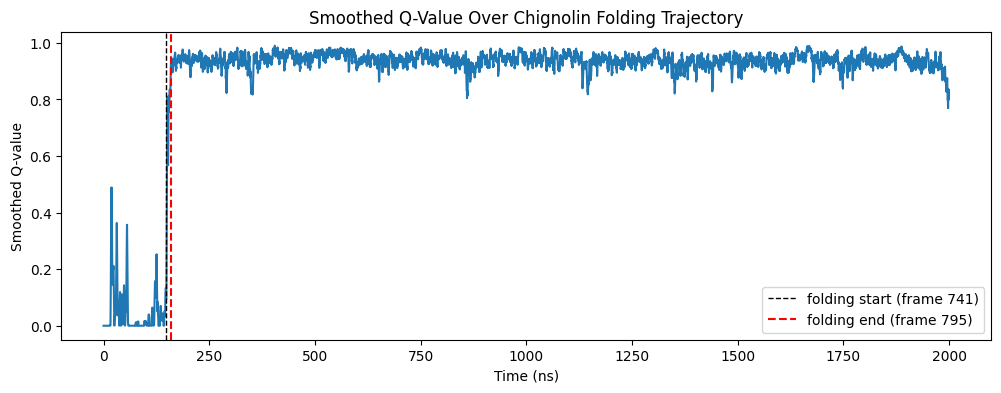

In [58]:
frame1 = event['start_frame']
frame2 = event['end_frame']
plt.figure(figsize=(12,4))
plt.plot(traj.time * 2 / 1000, q_smooth)
plt.title("Smoothed Q-Value Over Chignolin Folding Trajectory")
plt.ylabel("Smoothed Q-value")
plt.xlabel("Time (ns)")
plt.axvline(frame1 * 2 /10, linewidth=1, color="black", linestyle="--", label=f"folding start (frame {frame1})")
plt.axvline(frame2 * 2 /10, color="red", linestyle="--", label=f"folding end (frame {frame2})")
plt.legend()

plt.savefig("/Users/kebl8116-admin/Projects/protein_folding_graphs/images/chignolin_q_value.png")

In [62]:
import numpy as np
import pandas as pd

def get_transition_paths_mine(distances, time_step_ns=0.2, window_ns=10.0, 
                         q_folded=6, q_unfolded=10):

    # 1. Apply Smoothing (Running Average)
    # Convert window time to number of frames (must be odd integer ideally)
    window_frames = int(window_ns / time_step_ns)
    if window_frames < 1: 
        window_frames = 1
        
    # Use pandas for easy rolling average; center=True avoids phase shift
    q_series = pd.Series(distances)
    q_smooth = q_series.rolling(window=window_frames, center=True).mean().fillna(q_series)
    q_smooth = q_smooth.values

    # 2. Assign Stable States
    #  1 = Folded
    # -1 = Unfolded
    #  0 = Intermediate/Transition
    state_traj = np.zeros(len(q_smooth), dtype=int)
    state_traj[q_smooth < q_folded] = 1
    state_traj[q_smooth > q_unfolded] = -1

    # 3. Identify Valid Transitions
    # We only care about frames where the system is CLEARLY in a stable state.
    # We find indices of frames that are either 1 or -1.
    stable_indices = np.where(state_traj != 0)[0]
    
    if len(stable_indices) < 2:
        print("Trajectory does not visit enough stable states to identify transitions.")
        return [], q_smooth

    # Check for switches between distinct stable states
    # stable_states_sequence is the sequence of 1s and -1s visiting over time
    stable_states_sequence = state_traj[stable_indices]
    
    transitions = []
    # Iterate through the sequence of stable frames
    for k in range(len(stable_indices) - 1):
        curr_state = stable_states_sequence[k]
        next_state = stable_states_sequence[k+1]
        
        # If the state changes (e.g., 1 to -1 or -1 to 1), we found a transition block
        if curr_state != next_state:
            # The transition path is the segment between these two stable points.
            # start_idx: the LAST frame in the previous stable state
            # end_idx: the FIRST frame in the new stable state
            start_idx = stable_indices[k]
            end_idx = stable_indices[k+1]
            
            # Determine type
            t_type = "unfolding" if (curr_state == 1 and next_state == -1) else "folding"
            
            transitions.append({
                'type': t_type,
                'start_frame': start_idx,
                'end_frame': end_idx,
                'duration_ns': (end_idx - start_idx) * time_step_ns
            })

    print(f"Found {len(transitions)} valid transition paths.")
    return transitions, q_smooth

# Run Analysis
events, q_smooth = get_transition_paths_mine(distances, time_step_ns=1, window_ns=10)

for i, event in enumerate(events):
    print(f"Event {i+1}: {event['type'].upper()}")
    print(f"  Frames: {event['start_frame']} -> {event['end_frame']}")
    print(f"  Duration: {event['duration_ns'] / 5:.2f} ns")

Found 7 valid transition paths.
Event 1: FOLDING
  Frames: 62 -> 75
  Duration: 2.60 ns
Event 2: UNFOLDING
  Frames: 289 -> 315
  Duration: 5.20 ns
Event 3: FOLDING
  Frames: 376 -> 409
  Duration: 6.60 ns
Event 4: UNFOLDING
  Frames: 490 -> 510
  Duration: 4.00 ns
Event 5: FOLDING
  Frames: 526 -> 536
  Duration: 2.00 ns
Event 6: UNFOLDING
  Frames: 537 -> 542
  Duration: 1.00 ns
Event 7: FOLDING
  Frames: 590 -> 647
  Duration: 11.40 ns


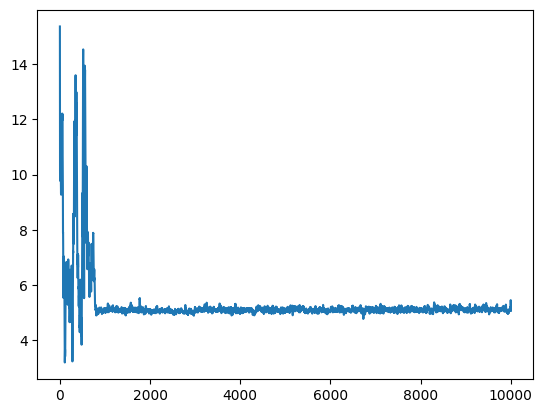

In [31]:
plt.plot(q_smooth)

FS PEPTIDE

Frames: 14000 N: 21 Unique maps: 11657


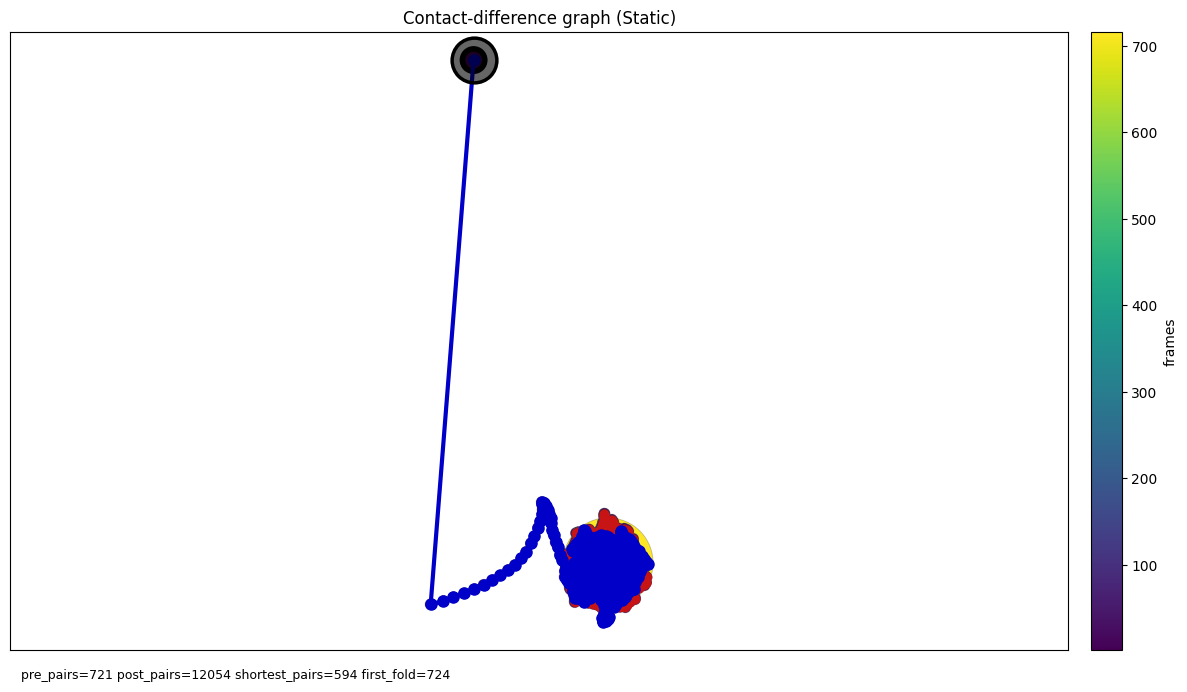

In [33]:
pdb = "/Users/kebl8116-admin/Projects/origami/data/fs-peptide/fs-peptide.pdb"
xtc = "/Users/kebl8116-admin/Projects/origami/data/fs-peptide/merged_subsampled.xtc"

contact_maps = topology.get_contact_maps(top=pdb, traj=xtc)
unique_maps, frame_to_uid, inds = topology.get_unique_maps(contact_maps)

G, counter, node_counts = graphs.build_temporal_transition_graph(frame_to_uid, inds, keep_self_loops=False)
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, unique_maps=unique_maps, unique_indices=inds, interactive=False)

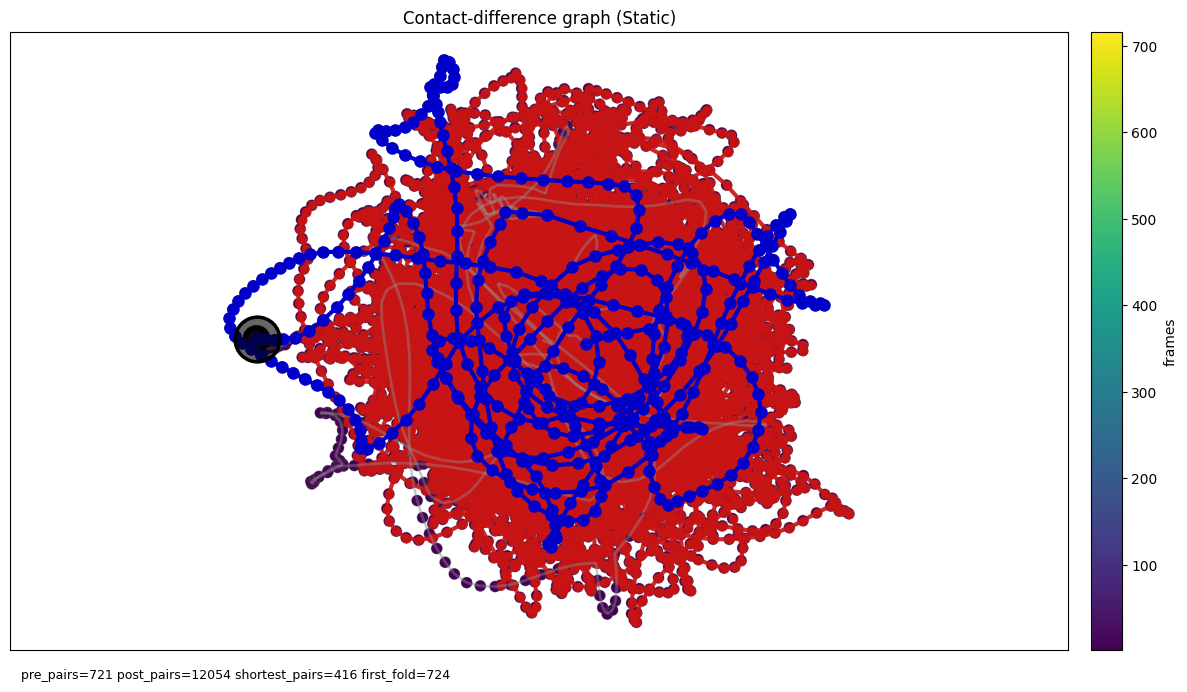

In [34]:
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)
Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, unique_maps=unique_maps, unique_indices=inds, interactive=False)

/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/kebl8116-admin/miniconda3/envs

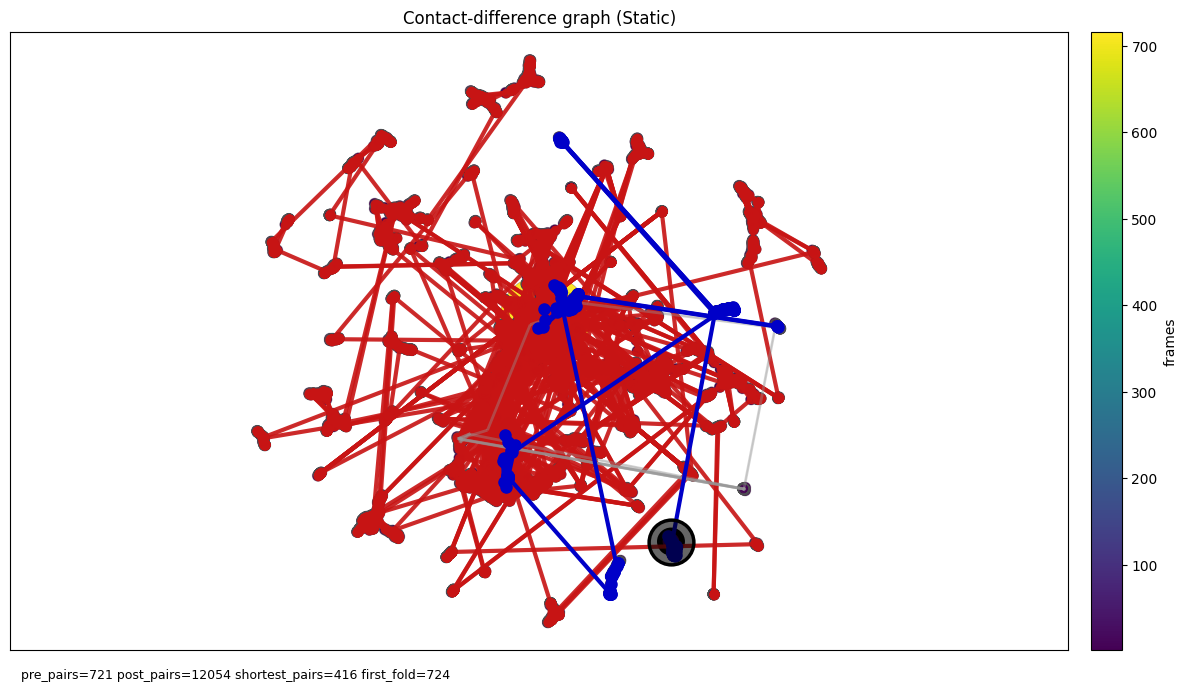

In [35]:
flat_bits, tri, Mbits = topology.flatten_upper_bits(unique_maps)
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)
Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)
X_emb, pca = clustering.embed_flat_bits(flat_bits, pca_n=45, umap_n=2)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False)

/var/folders/bd/1_0prvlx06lcc135mt668_3r0000gs/T/ipykernel_26668/516664125.py:144: UserWarning: U=11657 large: pairwise Hamming (U^2) will be expensive and memory-heavy.
  warnings.warn(f"U={U} large: pairwise Hamming (U^2) will be expensive and memory-heavy.", UserWarning)
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  r

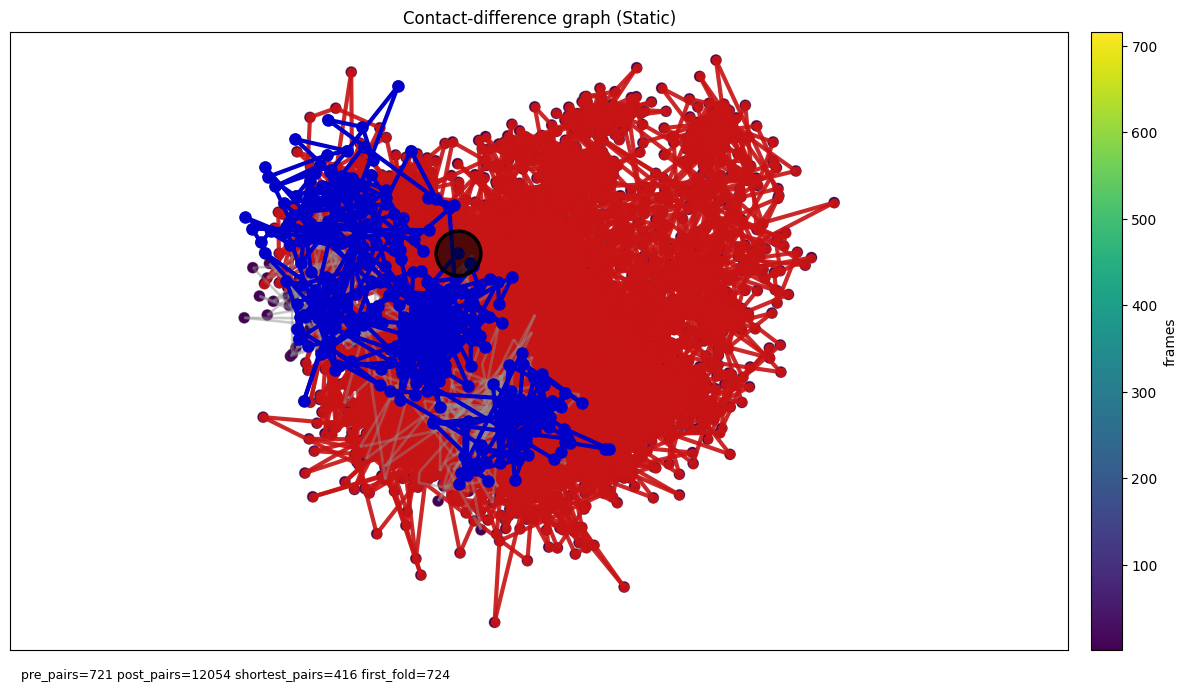

In [37]:
X_emb, labels, D = embed_and_cluster_by_hamming(ints,
                                 n_components=10,
                                 embed_method='mds',   # 'mds' or 'spectral'
                                 cluster_method='agglomerative',  # 'agglomerative' or 'hdbscan'
                                 n_clusters=None,      # only for agglomerative
                                 random_state=42,
                                 warn_threshold=4000)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False)

Lambda Repressor

In [ ]:
# '''
# Lambda Repressor
# '''

# with open("/Users/kebl8116-admin/Projects/origami/data/fast-folders/experimental_structures/lambda_1lmb.pdb", "r") as f:
#     pdb_str = f.read()
# coords = np.load("/Users/kebl8116-admin/Projects/origami/data/fast-folders/lambda_ca_coords.npy")
# #foldons = foldon_pipeline(coords[:100000,:,:])
# aligned_ca_coords = align_traj(coords[::100,:,:] , ref=coords[-1])
# T, N, _ = aligned_ca_coords.shape
# contact_maps = np.zeros((T, N, N), dtype=bool)
# for t, x in enumerate(aligned_ca_coords):
#     contact_maps[t] = contact_map_from_coords(x, rc=8.0, seq_sep=2)
# unique_maps, frame_to_uid, inds = get_unique_maps(contact_maps)
# flat, tri, Mbits = flatten_upper_bits(unique_maps)
# res = cluster_and_build_graph(flat, frame_to_uid, unique_maps=None, unique_indices=None,
#                             use_umap=True, clustering_method='hdbscan',
#                             pca_n=50, umap_n=10, min_cluster_size=15, kmeans_k=500, random_state=42)
# #figw = plot_graph_with_embedding(res['G_rel'], res['X_cluster'], unique_maps=res['unique_maps_cluster'],
# #                                  unique_indices=res['unique_indices_cluster'], map_uid=res['map_uid_cluster'])
# Xc, _ = embed_for_clustering(flat, pca_n=50, umap_n=10, use_umap=True, random_state=42)
# labels, clobj = cluster_embedded(Xc, method="hdbscan", min_cluster_size=50,
#                                     kmeans_k=1000, random_state=42)
# labels = assign_noise_to_nearest(labels, Xc)
# medoids = compute_cluster_medoids(flat, labels)
# Gc = build_cluster_graph(frame_to_uid, labels)
# G_rel, X_cluster, unique_maps_cluster, unique_inds_cluster, map_uid_cluster = relabel_and_prepare(
#     Gc, labels, medoids, X_emb=Xc, unique_maps=unique_maps, unique_indices=inds, frame_to_uid=frame_to_uid)
# K = G_rel.number_of_nodes()



In [ ]:
from src import *
import MDAnalysis as mda

pdb = "/Users/kebl8116-admin/Projects/origami/data/fast-folders/experimental_structures/lambda_1lmb.pdb"
coords = np.load("/Users/kebl8116-admin/Projects/origami/data/fast-folders/lambda_ca_coords.npy")
coords = topology.align_traj(coords[::100,:,:] , ref=coords[-1])

# sanity checks
assert coords.ndim == 3 and coords.shape[2] == 3
n_frames, n_atoms_coords, _ = coords.shape

u_full = mda.Universe(pdb)
ca = u_full.select_atoms("name CA")

assert coords.shape[1] == ca.n_atoms

u = mda.Merge(ca) # Build CA-only topology
u.load_new(coords, order="fac") # Attach trajectory
contact_maps = topology.get_contact_maps(u)

unique_maps, frame_to_uid, inds = topology.get_unique_maps(contact_maps)
flat_bits, tri, Mbits = topology.flatten_upper_bits(unique_maps)
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)

Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)

# 1. Build the Physics Graph (Manifold Only + Kinetic)
G = graph_analysis.build_physics_graph(G, physics_mode="kinetic", 
                            restrict_to_manifold=True, 
                            frame_to_uid=frame_to_uid)

# start_node = int(frame_to_uid[0])
# folded_node = int(np.argmax(np.bincount(frame_to_uid)))

# path = nx.shortest_path(G, source=start_node, target=folded_node, weight='weight')

# q_values = graph_analysis.compute_committor(G, start_node, folded_node)

# nx.set_node_attributes(G, q_values, 'committor')

# nodes = list(G.nodes())
# node_colors_q = [G.nodes[i].get('committor', 0.0) for i in range(len(nodes))]

# print(f"Injected 'committor' values for {len(nodes)} nodes.")
# node_q_colors = [G.nodes[i].get('committor', 0.0) for i in range(len(G.nodes()))]


X_emb, labels, D = clustering.embed_and_cluster_by_hamming(ints,
                                 n_components=10,
                                 embed_method='mds',   # 'mds' or 'spectral'
                                 cluster_method='agglomerative',  # 'agglomerative' or 'hdbscan'
                                 n_clusters=None,      # only for agglomerative
                                 random_state=42,
                                 warn_threshold=4000)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}

fig, ax = plotting.plot_graph_auto(
    G, frame_to_uid, pos=pos, X_emb=X_emb,
    unique_maps=unique_maps,
    unique_indices=inds,
    start_frame=start_node,
    # physics_path_nodes=path, 
    # node_custom_color=node_q_colors,
    # node_custom_color_title="P(fold)",
    palette="RdBu_r",                 
    interactive = False
)
plt.savefig("images/lambda_repressor_true_manifold_graph.png")


Frames: 143630 N: 80 Unique maps: 143626
